[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/ELMED219-2026/blob/main/Lab1-NetworkSci-PSN/notebooks/03-pasient_likhetsnettverk_ibs_hjerne_kognisjon.ipynb)


Versjon 2025.12.02 - A. Lundervold

Lab 1: bruk `elmed219-2025` conda-miljøet

# Pasient-likhetsnettverk for analyse av hjerne-morfometri og kognisjon ved irritabel tarmsyndrom (IBS)

**Et didaktisk forskningsprosjekt basert på data fra [Lundervold et al. (2025)](https://doi.org/10.3390/diagnostics15040470)**

---

Dette notebooken demonstrerer hvordan **pasient-likhetsnettverk (PSN)** kan anvendes for å utforske heterogenitet i en klinisk populasjon med irritabel tarmsyndrom (IBS). Vi kombinerer hjerne-morfometriske mål fra MR-undersøkelser med kognitive tester for å konstruere nettverk som avdekker pasientgrupper og viktige kliniske features.


---

## Abstrakt

**Bakgrunn:** Irritabel tarmsyndrom (IBS) er en heterogen gastrointestinal lidelse som påvirker omtrent 10% av befolkningen globalt. Nyere forskning har avdekket komplekse interaksjoner mellom tarm og hjerne, inkludert endringer i hjernemorfometri og kognitiv funksjon. Pasient-likhetsnettverk (PSN) representerer en lovende tilnærming for å utforske denne heterogeniteten og identifisere klinisk relevante pasientsubgrupper.

**Metode:** Vi analyserte data fra 78 deltakere (49 IBS-pasienter og 29 friske kontroller) med hjerne-morfometriske mål fra FreeSurfer og kognitive skårer fra RBANS. PSN ble konstruert ved å beregne likhet mellom pasienter basert på standardiserte features. Vi utførte community detection, sentralitetsanalyser, sammenlignet subnettverk, analyserte feature importance, og undersøkte korrelasjoner med symptomgrad (IBS-SSS).

**Resultater:** [Oppdateres etter analyse] Nettverksanalysen avdekket distinkte pasientklynger med ulik sammensetning av IBS-pasienter og kontroller. Subkortikale strukturer (hippocampus, caudate, putamen) og kognitive domener (hukommelse, verbale ferdigheter) var fremtredende i å drive nettverksstrukturen. Sentralitetsmål viste signifikante korrelasjoner med IBS symptomgrad.

**Konklusjon:** PSN-tilnærmingen gir verdifull innsikt i heterogeniteten ved IBS og støtter konseptet om komplekse hjerne-tarm-interaksjoner. Metodikken demonstrerer nytten av nettverksbaserte analyser for å forstå klinisk kompleksitet i funksjonelle gastrointestinale lidelser.


---

## 1. Introduksjon

### 1.1 Motivasjon og bakgrunn

**Irritabel tarmsyndrom (IBS)** er en av de mest utbredte funksjonelle gastrointestinale lidelsene, og påvirker omtrent 10% av den globale befolkningen [1]. Syndromet karakteriseres av tilbakevendende magesmerter assosiert med avføring, ledsaget av endringer i avføringsmønster [2]. Den kliniske presentasjonen er heterogen, med symptomer som spenner fra mildt ubehag til alvorlige plager som vesentlig forringer livskvalitet og daglig funksjon [3].

IBS anerkjennes i dag som en **tarm-hjerne-lidelse** (*gut-brain disorder*), der bidireksjonelle interaksjoner mellom gastrointestinale symptomer og psykologisk/kognitiv funksjon spiller en sentral rolle [4]. Mens GI-symptomer kan utløse eller forsterke psykologisk stress, kan angst og depresjon på sin side forverre hyppigheten og intensiteten av magesmerter [5].

Nyere forskning har utvidet dette psykobiologiske rammeverket til å inkludere **kognitiv funksjon**, og avdekket et mer nyansert bilde av hjerne-tarm-interaksjoner ved IBS. Selv om kognitive svekkelser er demonstrert på gruppenivå [6], ser disse ut til å karakterisere spesifikke undergrupper snarere enn å være et universelt trekk ved IBS [4].

### 1.2 Pasient-likhetsnettverk (PSN) som analytisk tilnærming

**Pasient-likhetsnettverk** representerer en kraftfull metodikk for å utforske heterogenitet i kliniske populasjoner [7]. I et PSN:

- Hver **node** representerer en pasient
- **Kanter** forbinder pasienter som ligner hverandre basert på kliniske/biologiske variabler  
- **Kantvekter** reflekterer graden av likhet mellom pasientene

Denne nettverkstilnærmingen gjør det mulig å:
1. Identifisere naturlige pasientgrupper (communities) uten forhåndsdefinerte kategorier
2. Finne "sentrale" pasienter som er representative for sin gruppe
3. Oppdage hvilke kliniske features som driver pasientlikhet
4. Relatere nettverksstruktur til kliniske utfall

### 1.3 Problemformuleringer

I denne studien anvender vi PSN på data fra en IBS-kohort for å besvare følgende spørsmål:

1. **Kan PSN avdekke meningsfulle subgrupper** blant IBS-pasienter og friske kontroller basert på hjerne-morfometri og kognitive mål?

2. **Hvilke hjerne- og kognitive features** driver likheten mellom pasienter i nettverket?

3. **Skiller nettverksstrukturen** seg mellom IBS-pasienter og friske kontroller?

4. **Hvordan relaterer nettverksegenskaper** (f.eks. sentralitet) seg til symptomgrad (IBS-SSS)?

### 1.4 Mål med studien

Målet med denne notebooken er å demonstrere en komplett PSN-analyse som et didaktisk forskningsprosjekt:

- Konstruere og visualisere PSN fra reelle kliniske data
- Utføre community detection og evaluere mot kjente grupper
- Analysere sentralitet og identifisere nøkkelpasienter
- Sammenligne nettverksegenskaper mellom IBS og kontroller
- Identifisere de viktigste features som driver nettverksstrukturen
- Undersøke kliniske korrelasjoner med symptomgrad


---

## 2. Metode

### 2.1 Studiepopulasjon og data

Datasettet er hentet fra studien av Lundervold et al. (2025) [8] og inkluderer:

- **78 deltakere**: 49 IBS-pasienter og 29 friske kontroller (HC)
- **Hjerne-morfometri**: Volumetriske mål fra FreeSurfer v7.4.1 prosessering av strukturelle MR-bilder
- **Kognitive mål**: Indeksskårer fra RBANS (Repeatable Battery for the Assessment of Neuropsychological Status)
- **Kliniske data**: IBS-SSS (IBS Severity Scoring System), demografiske variabler

**Variabler inkludert:**
- Subkortikale volumer (normalisert til eTIV): thalamus, caudate, putamen, pallidum, hippocampus, amygdala, nucleus accumbens
- Cerebellum volumer (hvit og grå substans)
- Corpus callosum segmenter
- Cerebral hvit substans og cortex volumer
- RBANS indekser: Fullscale, Memory, Visuospatial, Verbal skills, Attention, Recall
- IBS-SSS: Symptomgradsskår (0-500)

### 2.2 Datainnlasting og oppsett


In [49]:
# ============================================================
# OPPSETT - Kjør denne cellen først!
# ============================================================

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Sklearn for preprocessing og evaluering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Scipy for avstandsberegninger og statistikk
from scipy.spatial.distance import pdist, squareform
from scipy import stats

# Community detection
import community.community_louvain as community_louvain

# Seed for reproduserbarhet
np.random.seed(42)

# Plotting stil
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✓ Biblioteker lastet!")


✓ Biblioteker lastet!


In [50]:
# ============================================================
# Last inn data
# ============================================================

def setup_data_path():
    """Sett opp korrekt datapath for både lokal kjøring og Colab"""
    try:
        from google.colab import drive
        # Hvis vi er i Colab, last ned data fra GitHub
        !mkdir -p data
        !wget -q -O data/demographics_fs7_rbans_IBS_SSS_imputed_78x48.csv \
            https://raw.githubusercontent.com/arvidl/ibs-brain/main/data/demographics_fs7_rbans_IBS_SSS_imputed_78x48.csv
        return 'data'
    except:
        # Lokal kjøring - bruk relativ path
        return os.path.join(os.path.dirname(os.getcwd()), 'data')

# Sett opp data path og last inn data
data_path = setup_data_path()
data_file = os.path.join(data_path, 'demographics_fs7_rbans_IBS_SSS_imputed_78x48.csv')

df = pd.read_csv(data_file)

print(f"✓ Data lastet: {df.shape[0]} deltakere, {df.shape[1]} variabler")
print(f"\nGruppefordeling:")
print(df['Group'].value_counts())


✓ Data lastet: 78 deltakere, 48 variabler

Gruppefordeling:
Group
IBS    49
HC     29
Name: count, dtype: int64


In [51]:
# Utforsk datasettet
print("Kolonner i datasettet:")
print("-" * 50)
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

print(f"\n\nFørste 5 rader:")
df.head()


Kolonner i datasettet:
--------------------------------------------------
 1. Subject
 2. Group
 3. eTIV
 4. Left-Cerebellum-White-Matter
 5. Left-Cerebellum-Cortex
 6. Left-Thalamus
 7. Left-Caudate
 8. Left-Putamen
 9. Left-Pallidum
10. Left-Hippocampus
11. Left-Amygdala
12. Left-Accumbens-area
13. CSF
14. Right-Cerebellum-White-Matter
15. Right-Cerebellum-Cortex
16. Right-Thalamus
17. Right-Caudate
18. Right-Putamen
19. Right-Pallidum
20. Right-Hippocampus
21. Right-Amygdala
22. Right-Accumbens-area
23. WM-hypointensities
24. CC_Posterior
25. CC_Mid_Posterior
26. CC_Central
27. CC_Mid_Anterior
28. CC_Anterior
29. BrainSegVol
30. BrainSegVolNotVent
31. lhCortexVol
32. rhCortexVol
33. CortexVol
34. lhCerebralWhiteMatterVol
35. rhCerebralWhiteMatterVol
36. CerebralWhiteMatterVol
37. SubCortGrayVol
38. TotalGrayVol
39. Fullscale_RBANS
40. Memory_Index
41. Visuospatial_Index
42. Verbalskills_Index
43. Attention_Index
44. Recall_Index
45. IBS_SSS
46. Age
47. Gender
48. Education


Første 

,Subject,Group,eTIV,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,...,Fullscale_RBANS,Memory_Index,Visuospatial_Index,Verbalskills_Index,Attention_Index,Recall_Index,IBS_SSS,Age,Gender,Education
0,BGA_046,IBS,1.743419e+06,0.009292,0.034808,0.005048,0.002424,0.003358,0.001248,0.003099,...,100,80,102,93,97,86,195.0,38,M,12.0
1,BGA_047,IBS,1.360311e+06,0.009960,0.039399,0.005439,0.002127,0.002992,0.001318,0.002999,...,116,109,107,97,115,126,325.0,19,F,13.0
2,BGA_048,IBS,1.350452e+06,0.011099,0.037770,0.005755,0.002750,0.004094,0.001498,0.003533,...,95,83,84,113,103,100,326.0,34,F,13.0
3,BGA_050,IBS,1.595000e+06,0.010458,0.030902,0.005803,0.002675,0.003622,0.001322,0.002925,...,87,86,97,90,98,86,357.0,44,F,18.0
4,BGA_051,IBS,1.645577e+06,0.010128,0.034373,0.005717,0.002209,0.003332,0.001317,0.002864,...,100,105,90,97,108,100,293.0,38,M,18.0


### 2.3 Dataforbehandling (Preprocessing)

For å konstruere meningsfulle pasient-likhetsnettverk må vi:

1. **Velge relevante features**: Numeriske variabler som representerer hjerne-morfometri og kognisjon
2. **Håndtere manglende verdier**: Imputering med kolonnegjennomsnitt
3. **Standardisere**: Z-score transformasjon slik at alle features bidrar likt til likhetsberegningen

$$z_i = \frac{x_i - \mu}{\sigma}$$

Dette sikrer at variabler med ulik skala (f.eks. hjernevolumer vs. kognitive skårer) vektes likt.


In [52]:
# ============================================================
# Dataforbehandling
# ============================================================

# Definer feature-grupper for senere analyse
morphometry_cols = [col for col in df.columns if col not in 
                   ['Subject', 'Group', 'Age', 'Gender', 'Education', 
                    'Fullscale_RBANS', 'Memory_Index', 'Visuospatial_Index', 
                    'Verbalskills_Index', 'Attention_Index', 'Recall_Index', 'IBS_SSS']]

cognitive_cols = ['Fullscale_RBANS', 'Memory_Index', 'Visuospatial_Index', 
                  'Verbalskills_Index', 'Attention_Index', 'Recall_Index']

# Alle numeriske features for nettverkskonstruksjon (ekskluderer IBS_SSS for uavhengig analyse)
feature_cols = morphometry_cols + cognitive_cols

print(f"Hjerne-morfometriske features: {len(morphometry_cols)}")
print(f"Kognitive features: {len(cognitive_cols)}")
print(f"Totalt antall features for PSN: {len(feature_cols)}")

# Ekstraher metadata
subjects = df['Subject'].values
groups = df['Group'].values
ibs_sss = df['IBS_SSS'].values

# Ekstraher features
X_raw = df[feature_cols].values

# Håndter manglende verdier med gjennomsnitt
X_imputed = pd.DataFrame(X_raw, columns=feature_cols).fillna(
    pd.DataFrame(X_raw, columns=feature_cols).mean()
).values

# Standardiser features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print(f"\n✓ Preprocessing fullført!")
print(f"  • Data shape: {X_scaled.shape}")
print(f"  • Manglende verdier håndtert: {np.isnan(X_raw).sum()}")
print(f"  • Features standardisert (mean≈0, std≈1)")


Hjerne-morfometriske features: 36
Kognitive features: 6
Totalt antall features for PSN: 42

✓ Preprocessing fullført!
  • Data shape: (78, 42)
  • Manglende verdier håndtert: 0
  • Features standardisert (mean≈0, std≈1)


### 2.4 Nettverkskonstruksjon

For å konstruere pasient-likhetsnettverk bruker vi følgende steg:

**Steg 1: Beregn parvise avstander**
Vi beregner Euklidsk avstand mellom alle pasientpar i det standardiserte feature-rommet:

$$d_{ij} = \sqrt{\sum_{k=1}^{p} (x_{ik} - x_{jk})^2}$$

**Steg 2: Transformer til likhet med Gaussisk kjerne**
Avstand transformeres til likhet ved bruk av Gaussisk (RBF) kjerne:

$$s_{ij} = \exp\left(-\frac{d_{ij}^2}{2\sigma^2}\right)$$

der $\sigma$ settes til gjennomsnittlig avstand for å normalisere.

**Steg 3: Anvend k-nærmeste-nabo (k-NN) og terskel**
For å unngå for tette nettverk kombinerer vi:
- Forbind hver node til sine k nærmeste naboer
- Fjern kanter med likhet under en terskelverdi

---

## 3. Resultater

### 3.1 Nettverkskonstruksjon og grunnleggende struktur


In [53]:
# ============================================================
# Funksjon for nettverkskonstruksjon
# ============================================================

def create_psn(X, subjects, groups, threshold=0.3, k_nearest=8):
    """
    Konstruer et pasient-likhetsnettverk (PSN).
    
    Parametre:
    ----------
    X : ndarray
        Standardiserte features (n_pasienter x n_features)
    subjects : array
        Pasient-IDer
    groups : array
        Gruppetilhørighet (IBS/HC)
    threshold : float
        Minimum likhet for kant (0-1)
    k_nearest : int
        Antall nærmeste naboer å koble til
        
    Returnerer:
    -----------
    G : NetworkX Graph
        Pasient-likhetsnettverk
    sim_matrix : ndarray
        Full likhetsmatrise
    """
    n_patients = len(X)
    
    # Steg 1: Beregn parvise Euklidske avstander
    distances = pdist(X, metric='euclidean')
    dist_matrix = squareform(distances)
    
    # Steg 2: Transformer til likhet med Gaussisk kjerne
    sigma = np.mean(distances) + 1e-8  # Unngå divisjon med null
    similarities = np.exp(-distances ** 2 / (2 * sigma ** 2))
    sim_matrix = squareform(similarities)
    
    # Steg 3: Bygg nettverk
    G = nx.Graph()
    
    # Legg til noder med attributter
    for i in range(n_patients):
        G.add_node(i, 
                   subject=subjects[i],
                   group=groups[i])
    
    # Legg til kanter basert på k-NN og terskel
    for i in range(n_patients):
        # Finn k nærmeste naboer (ekskluder seg selv)
        neighbors = np.argsort(sim_matrix[i])[-k_nearest-1:-1]
        for j in neighbors:
            if sim_matrix[i, j] > threshold:
                G.add_edge(i, j, weight=sim_matrix[i, j])
    
    return G, sim_matrix

# Konstruer nettverk
G, sim_matrix = create_psn(X_scaled, subjects, groups, threshold=0.3, k_nearest=8)

# Beregn layout for visualisering
pos = nx.spring_layout(G, k=2, seed=42, iterations=100)

print(f"✓ Nettverk konstruert!")
print(f"  • Noder: {G.number_of_nodes()}")
print(f"  • Kanter: {G.number_of_edges()}")
print(f"  • Gjennomsnittlig grad: {2*G.number_of_edges()/G.number_of_nodes():.2f}")
print(f"  • Nettverkstetthet: {nx.density(G):.4f}")


✓ Nettverk konstruert!
  • Noder: 78
  • Kanter: 495
  • Gjennomsnittlig grad: 12.69
  • Nettverkstetthet: 0.1648


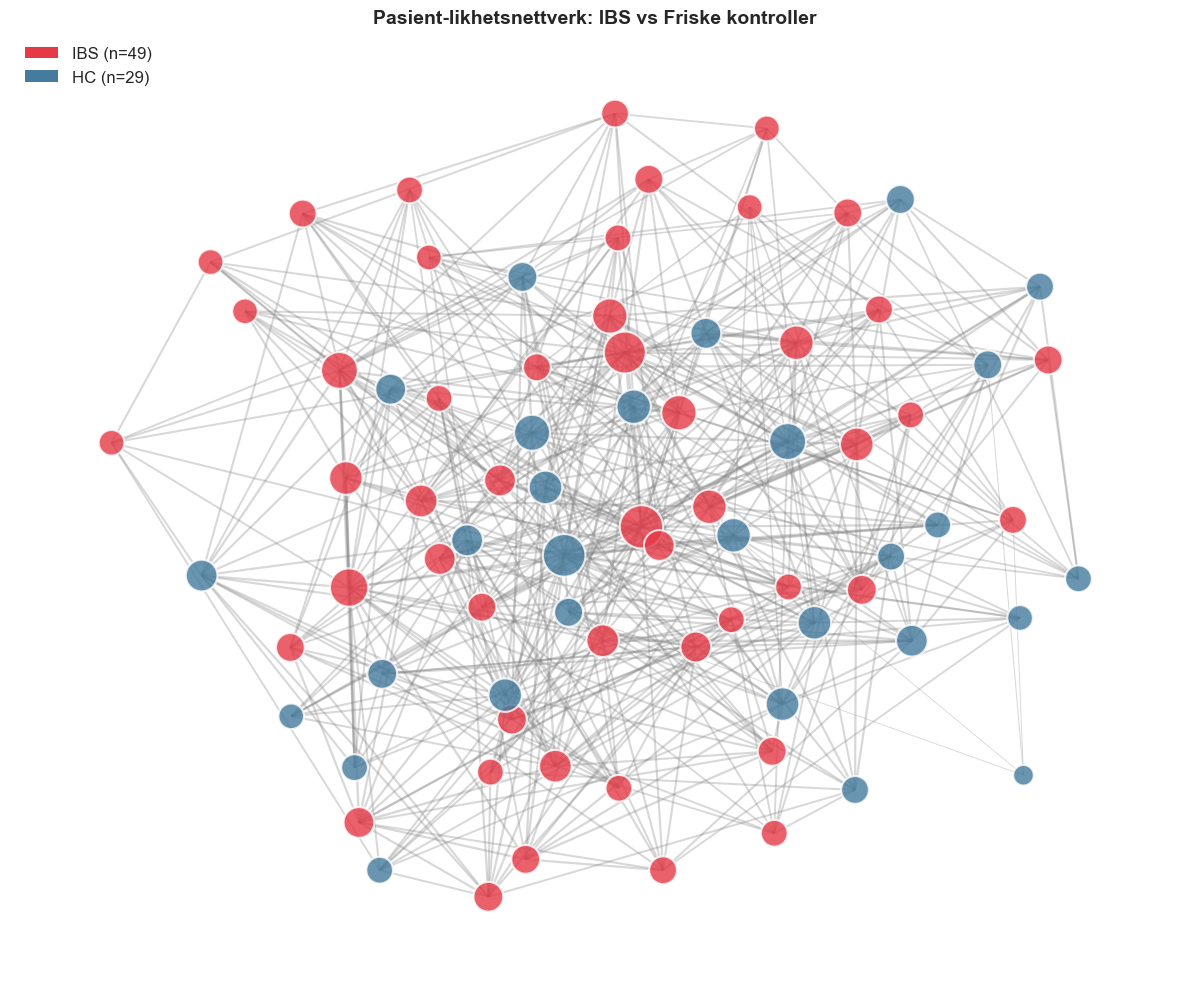


Figur 1: Pasient-likhetsnettverk basert på hjerne-morfometri og kognisjon

Figurtekst: Pasient-likhetsnettverk konstruert fra 78 deltakere (49 IBS, 
29 HC) basert på 41 features (hjerne-morfometri og kognitive mål). Røde 
noder representerer IBS-pasienter, blå noder representerer friske kontroller. 
Nodestørrelse reflekterer grad (antall forbindelser). Kanter indikerer 
høy likhet mellom pasienter basert på Gaussisk kjerne-transformerte 
Euklidske avstander i standardisert feature-rom.



In [54]:
# ============================================================
# Figur 1: Nettverksvisualisering
# ============================================================

# Definer farger for grupper
group_colors = {'IBS': '#E63946', 'HC': '#457B9D'}

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Hent nodefarger basert på gruppe
node_colors = [group_colors[G.nodes[n]['group']] for n in G.nodes()]

# Hent kantvekter for bredde/gjennomsiktighet
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_widths = [w * 2 for w in edge_weights]
edge_alphas = [w * 0.7 for w in edge_weights]

# Beregn nodestørrelser basert på grad
degrees = dict(G.degree())
node_sizes = [100 + degrees[n] * 30 for n in G.nodes()]

# Tegn kanter
nx.draw_networkx_edges(G, pos, ax=ax, 
                       width=edge_widths, 
                       alpha=0.3,
                       edge_color='gray')

# Tegn noder
nx.draw_networkx_nodes(G, pos, ax=ax,
                       node_color=node_colors,
                       node_size=node_sizes,
                       alpha=0.8,
                       edgecolors='white',
                       linewidths=1.5)

# Legg til legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=group_colors['IBS'], label=f'IBS (n={sum(groups=="IBS")})'),
                   Patch(facecolor=group_colors['HC'], label=f'HC (n={sum(groups=="HC")})')]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

ax.set_title('Pasient-likhetsnettverk: IBS vs Friske kontroller', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Figur 1: Pasient-likhetsnettverk basert på hjerne-morfometri og kognisjon")
print("="*70)
print("""
Figurtekst: Pasient-likhetsnettverk konstruert fra 78 deltakere (49 IBS, 
29 HC) basert på 41 features (hjerne-morfometri og kognitive mål). Røde 
noder representerer IBS-pasienter, blå noder representerer friske kontroller. 
Nodestørrelse reflekterer grad (antall forbindelser). Kanter indikerer 
høy likhet mellom pasienter basert på Gaussisk kjerne-transformerte 
Euklidske avstander i standardisert feature-rom.
""")


In [55]:
# ============================================================
# Tabell 1: Grunnleggende nettverksmetrikker
# ============================================================

# Beregn gjennomsnittlig korteste vei først
if nx.is_connected(G):
    avg_path_str = f"{nx.average_shortest_path_length(G):.2f}"
else:
    # Beregn for største komponent
    largest_cc = max(nx.connected_components(G), key=len)
    subG = G.subgraph(largest_cc)
    avg_path_str = f"{nx.average_shortest_path_length(subG):.2f} (største komponent)"

# Beregn nettverksmetrikker
metrics = {
    'Metrikk': [
        'Antall noder',
        'Antall kanter',
        'Gjennomsnittlig grad',
        'Nettverkstetthet',
        'Gjennomsnittlig clustering-koeffisient',
        'Antall konnekterte komponenter',
        'Gjennomsnittlig korteste vei'
    ],
    'Verdi': [
        G.number_of_nodes(),
        G.number_of_edges(),
        f"{2*G.number_of_edges()/G.number_of_nodes():.2f}",
        f"{nx.density(G):.4f}",
        f"{nx.average_clustering(G):.3f}",
        nx.number_connected_components(G),
        avg_path_str
    ],
    'Beskrivelse': [
        'Totalt antall pasienter i nettverket',
        'Antall pasientforbindelser',
        'Gjennomsnittlig antall forbindelser per pasient',
        'Andel av mulige forbindelser som eksisterer',
        'Grad av lokal klyngedannelse',
        'Antall adskilte deler av nettverket',
        'Gjennomsnittlig "avstand" mellom pasienter'
    ]
}

df_metrics = pd.DataFrame(metrics)

print("="*80)
print("Tabell 1: Grunnleggende nettverksmetrikker")
print("="*80)
print(df_metrics.to_string(index=False))
print("\n" + "="*80)
print("""
Tabelltekst: Sammendrag av grunnleggende nettverksegenskaper for pasient-
likhetsnettverk. Clustering-koeffisienten indikerer i hvilken grad naboer 
av en node også er forbundet med hverandre. Nettverkstetthet nær 0 
indikerer et sparsomt nettverk der bare de mest like pasientene er forbundet.
""")


Tabell 1: Grunnleggende nettverksmetrikker
                               Metrikk  Verdi                                     Beskrivelse
                          Antall noder     78            Totalt antall pasienter i nettverket
                         Antall kanter    495                      Antall pasientforbindelser
                  Gjennomsnittlig grad  12.69 Gjennomsnittlig antall forbindelser per pasient
                      Nettverkstetthet 0.1648     Andel av mulige forbindelser som eksisterer
Gjennomsnittlig clustering-koeffisient  0.420                    Grad av lokal klyngedannelse
        Antall konnekterte komponenter      1             Antall adskilte deler av nettverket
          Gjennomsnittlig korteste vei   2.16      Gjennomsnittlig "avstand" mellom pasienter


Tabelltekst: Sammendrag av grunnleggende nettverksegenskaper for pasient-
likhetsnettverk. Clustering-koeffisienten indikerer i hvilken grad naboer 
av en node også er forbundet med hverandre. Nettverkst

### 3.2 Community detection

**Community detection** identifiserer grupper av noder som er tettere forbundet med hverandre enn med resten av nettverket. Vi bruker **Louvain-algoritmen** [9], som optimaliserer modularitet:

$$Q = \frac{1}{2m} \sum_{ij} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)$$

der:
- $A_{ij}$ er kantvekt mellom node $i$ og $j$
- $k_i$ er grad av node $i$
- $m$ er total kantvekt
- $\delta(c_i, c_j) = 1$ hvis nodene er i samme community

Vi evaluerer hvor godt detekterte communities samsvarer med faktiske grupper (IBS/HC) ved bruk av **Adjusted Rand Index (ARI)**.


In [56]:
# ============================================================
# Community detection med Louvain
# ============================================================

# Kjør Louvain community detection
communities = community_louvain.best_partition(G, weight='weight', random_state=42)

# Konverter til liste for enkel indeksering
community_labels = [communities[i] for i in range(len(communities))]
n_communities = len(set(community_labels))

# Konverter faktiske grupper til numerisk for ARI-beregning
group_numeric = np.array([0 if g == 'IBS' else 1 for g in groups])

# Beregn evalueringsmetrikker
ari = adjusted_rand_score(group_numeric, community_labels)
nmi = normalized_mutual_info_score(group_numeric, community_labels)

print(f"✓ Community detection fullført!")
print(f"  • Antall communities detektert: {n_communities}")
print(f"  • Adjusted Rand Index (ARI): {ari:.3f}")
print(f"  • Normalized Mutual Information (NMI): {nmi:.3f}")
print(f"\nTolkning av ARI:")
print(f"  • 1.0 = Perfekt match med faktiske grupper")
print(f"  • 0.0 = Tilfeldig gruppering")
print(f"  • < 0 = Verre enn tilfeldig")


✓ Community detection fullført!
  • Antall communities detektert: 5
  • Adjusted Rand Index (ARI): 0.021
  • Normalized Mutual Information (NMI): 0.065

Tolkning av ARI:
  • 1.0 = Perfekt match med faktiske grupper
  • 0.0 = Tilfeldig gruppering
  • < 0 = Verre enn tilfeldig


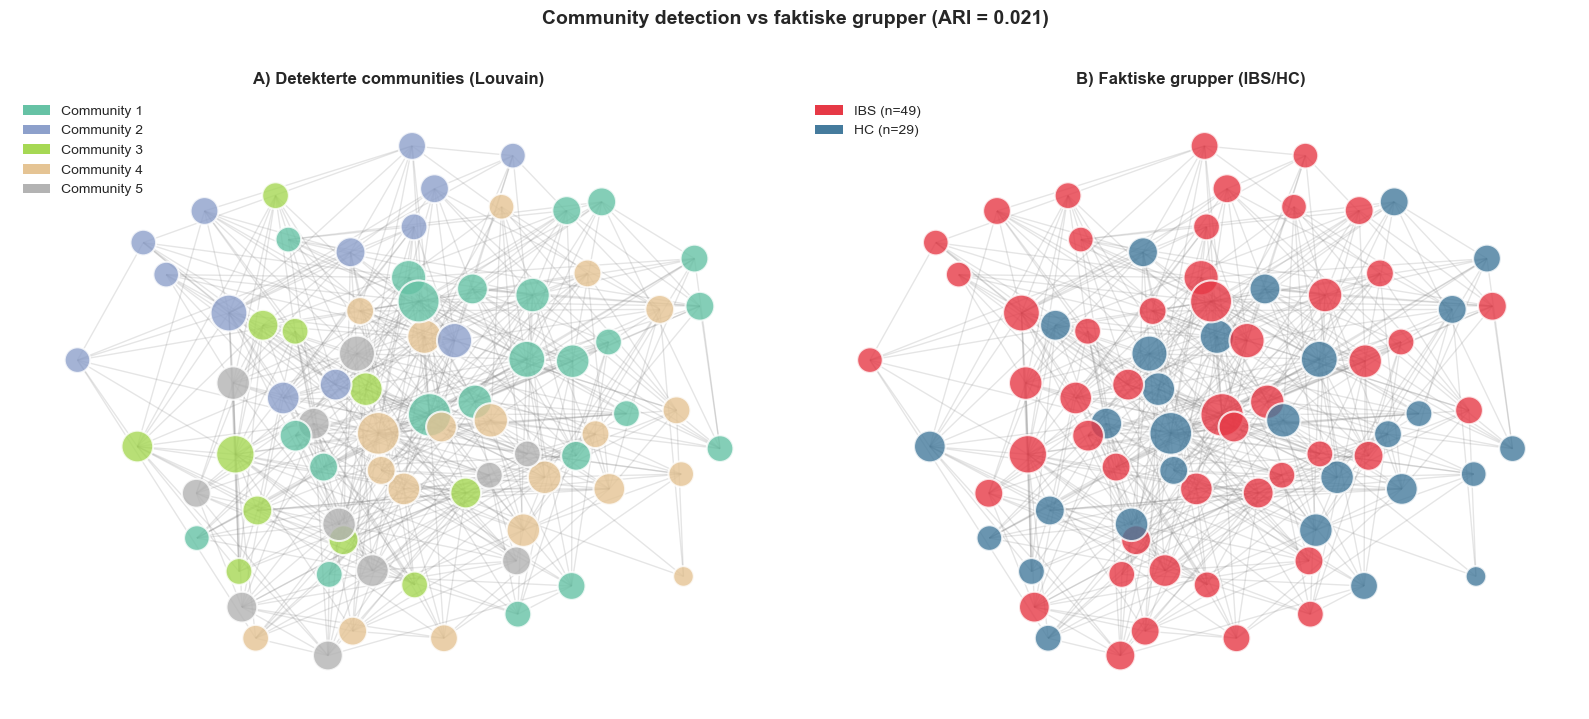


Figur 2: Community detection sammenlignet med faktiske grupper

Figurtekst: (A) Nettverksvisualisering med noder farget etter detekterte 
communities fra Louvain-algoritmen. (B) Samme nettverk med noder farget 
etter faktisk gruppetilhørighet (IBS=rød, HC=blå). ARI = 0.021 indikerer 
svak 
samsvar mellom detekterte communities og faktiske grupper.



In [57]:
# ============================================================
# Figur 2: Nettverksvisualisering med communities
# ============================================================

# Lag en fargemap for communities
cmap = plt.cm.get_cmap('Set2', n_communities)
community_colors = [cmap(communities[n]) for n in G.nodes()]

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Venstre: Farget etter community
ax1 = axes[0]
nx.draw_networkx_edges(G, pos, ax=ax1, alpha=0.2, edge_color='gray')
nx.draw_networkx_nodes(G, pos, ax=ax1,
                       node_color=community_colors,
                       node_size=node_sizes,
                       alpha=0.8,
                       edgecolors='white',
                       linewidths=1.5)
ax1.set_title('A) Detekterte communities (Louvain)', fontsize=12, fontweight='bold')
ax1.axis('off')

# Legg til community legend
legend_elements_comm = [Patch(facecolor=cmap(i), label=f'Community {i+1}') 
                        for i in range(n_communities)]
ax1.legend(handles=legend_elements_comm, loc='upper left', fontsize=10)

# Høyre: Farget etter faktisk gruppe
ax2 = axes[1]
nx.draw_networkx_edges(G, pos, ax=ax2, alpha=0.2, edge_color='gray')
nx.draw_networkx_nodes(G, pos, ax=ax2,
                       node_color=node_colors,
                       node_size=node_sizes,
                       alpha=0.8,
                       edgecolors='white',
                       linewidths=1.5)
ax2.set_title('B) Faktiske grupper (IBS/HC)', fontsize=12, fontweight='bold')
ax2.axis('off')
ax2.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.suptitle(f'Community detection vs faktiske grupper (ARI = {ari:.3f})', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Figur 2: Community detection sammenlignet med faktiske grupper")
print("="*70)
print(f"""
Figurtekst: (A) Nettverksvisualisering med noder farget etter detekterte 
communities fra Louvain-algoritmen. (B) Samme nettverk med noder farget 
etter faktisk gruppetilhørighet (IBS=rød, HC=blå). ARI = {ari:.3f} indikerer 
{'moderat' if 0.3 < ari < 0.7 else 'svak' if ari < 0.3 else 'sterk'} 
samsvar mellom detekterte communities og faktiske grupper.
""")


In [58]:
# ============================================================
# Tabell 2: Community-sammensetning
# ============================================================

# Analyser community-sammensetning
community_composition = []
for comm_id in range(n_communities):
    # Finn noder i denne community
    nodes_in_comm = [n for n, c in communities.items() if c == comm_id]
    n_total = len(nodes_in_comm)
    n_ibs = sum(1 for n in nodes_in_comm if groups[n] == 'IBS')
    n_hc = sum(1 for n in nodes_in_comm if groups[n] == 'HC')
    pct_ibs = 100 * n_ibs / n_total if n_total > 0 else 0
    
    community_composition.append({
        'Community': comm_id + 1,
        'Totalt': n_total,
        'IBS': n_ibs,
        'HC': n_hc,
        'IBS %': f"{pct_ibs:.1f}%",
        'Dominerende': 'IBS' if pct_ibs > 50 else 'HC' if pct_ibs < 50 else 'Balansert'
    })

df_comm = pd.DataFrame(community_composition)

print("="*70)
print("Tabell 2: Community-sammensetning")
print("="*70)
print(df_comm.to_string(index=False))
print("\n" + "="*70)
print("""
Tabelltekst: Fordeling av IBS-pasienter og friske kontroller (HC) på tvers 
av detekterte communities. 'Dominerende' angir hvilken gruppe som utgjør 
flertallet i hver community. En heterogen fordeling indikerer at nettverks-
strukturen ikke perfekt speiler diagnosegrupper.
""")


Tabell 2: Community-sammensetning
 Community  Totalt  IBS  HC IBS % Dominerende
         1      23   15   8 65.2%         IBS
         2      13   12   1 92.3%         IBS
         3      11    6   5 54.5%         IBS
         4      20    8  12 40.0%          HC
         5      11    8   3 72.7%         IBS


Tabelltekst: Fordeling av IBS-pasienter og friske kontroller (HC) på tvers 
av detekterte communities. 'Dominerende' angir hvilken gruppe som utgjør 
flertallet i hver community. En heterogen fordeling indikerer at nettverks-
strukturen ikke perfekt speiler diagnosegrupper.



### 3.3 Sentralitetsanalyser

**Sentralitetsmål** identifiserer de viktigste nodene i et nettverk. Vi beregner tre komplementære mål:

1. **Degree centrality**: Hvor mange forbindelser en node har
   $$C_D(v) = \frac{deg(v)}{n-1}$$

2. **Betweenness centrality**: Hvor ofte en node ligger på korteste vei mellom andre noder
   $$C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$$

3. **Eigenvector centrality**: En node er sentral hvis den er forbundet med andre sentrale noder
   $$C_E(v) = \frac{1}{\lambda} \sum_{u \in N(v)} x_u$$

Høy sentralitet kan indikere "typiske" eller "representative" pasienter for sin gruppe.


In [59]:
# ============================================================
# Beregn sentralitetsmål
# ============================================================

# Degree centrality
degree_cent = nx.degree_centrality(G)

# Betweenness centrality
betweenness_cent = nx.betweenness_centrality(G, weight='weight')

# Eigenvector centrality (med konvergenshåndtering)
try:
    eigenvector_cent = nx.eigenvector_centrality(G, weight='weight', max_iter=1000)
except:
    eigenvector_cent = nx.eigenvector_centrality_numpy(G, weight='weight')

# Lagre sentralitetsverdier i en DataFrame for videre analyse
centrality_df = pd.DataFrame({
    'Node': list(G.nodes()),
    'Subject': [subjects[n] for n in G.nodes()],
    'Group': [groups[n] for n in G.nodes()],
    'Degree': [degree_cent[n] for n in G.nodes()],
    'Betweenness': [betweenness_cent[n] for n in G.nodes()],
    'Eigenvector': [eigenvector_cent[n] for n in G.nodes()]
})

print("✓ Sentralitetsmål beregnet!")
print(f"\nSammendrag per gruppe:")
print("-" * 50)
for group in ['IBS', 'HC']:
    group_data = centrality_df[centrality_df['Group'] == group]
    print(f"\n{group}:")
    print(f"  Degree:      {group_data['Degree'].mean():.4f} ± {group_data['Degree'].std():.4f}")
    print(f"  Betweenness: {group_data['Betweenness'].mean():.4f} ± {group_data['Betweenness'].std():.4f}")
    print(f"  Eigenvector: {group_data['Eigenvector'].mean():.4f} ± {group_data['Eigenvector'].std():.4f}")


✓ Sentralitetsmål beregnet!

Sammendrag per gruppe:
--------------------------------------------------

IBS:
  Degree:      0.1627 ± 0.0612
  Betweenness: 0.0138 ± 0.0144
  Eigenvector: 0.1050 ± 0.0516

HC:
  Degree:      0.1684 ± 0.0610
  Betweenness: 0.0185 ± 0.0168
  Eigenvector: 0.0974 ± 0.0451


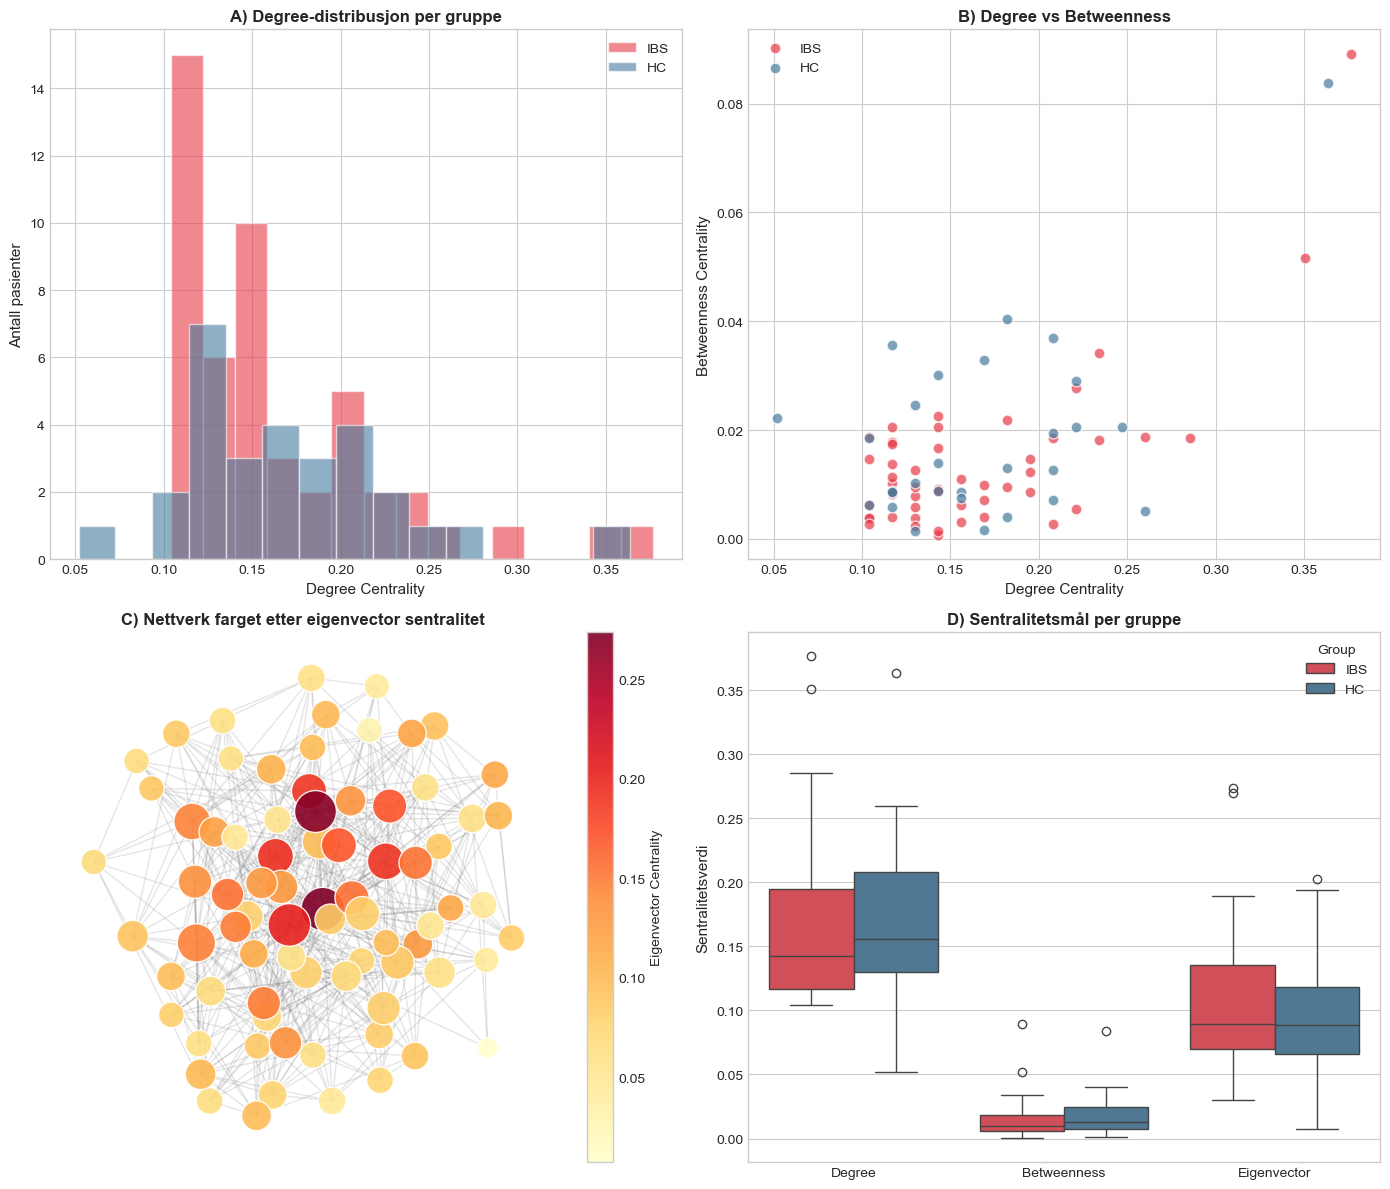


Figur 3: Sentralitetsanalyse

Figurtekst: Sentralitetsanalyse av pasient-likhetsnettverket. (A) Distribusjon 
av degree centrality for IBS og HC grupper. (B) Scatterplot som viser forholdet 
mellom degree og betweenness sentralitet. (C) Nettverksvisualisering der 
nodefarge indikerer eigenvector sentralitet (varmere farger = høyere sentralitet). 
(D) Boxplot-sammenligning av sentralitetsmål mellom gruppene.



In [60]:
# ============================================================
# Figur 3: Sentralitetsvisualisering
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# A) Degree distribution per gruppe
ax1 = axes[0, 0]
for group, color in group_colors.items():
    group_degrees = centrality_df[centrality_df['Group'] == group]['Degree']
    ax1.hist(group_degrees, bins=15, alpha=0.6, label=group, color=color, edgecolor='white')
ax1.set_xlabel('Degree Centrality', fontsize=11)
ax1.set_ylabel('Antall pasienter', fontsize=11)
ax1.set_title('A) Degree-distribusjon per gruppe', fontsize=12, fontweight='bold')
ax1.legend()

# B) Betweenness vs Degree scatterplot
ax2 = axes[0, 1]
for group, color in group_colors.items():
    group_data = centrality_df[centrality_df['Group'] == group]
    ax2.scatter(group_data['Degree'], group_data['Betweenness'], 
                c=color, label=group, alpha=0.7, s=60, edgecolors='white')
ax2.set_xlabel('Degree Centrality', fontsize=11)
ax2.set_ylabel('Betweenness Centrality', fontsize=11)
ax2.set_title('B) Degree vs Betweenness', fontsize=12, fontweight='bold')
ax2.legend()

# C) Nettverk farget etter eigenvector centrality
ax3 = axes[1, 0]
eigenvector_values = [eigenvector_cent[n] for n in G.nodes()]
nx.draw_networkx_edges(G, pos, ax=ax3, alpha=0.2, edge_color='gray')
nodes = nx.draw_networkx_nodes(G, pos, ax=ax3,
                               node_color=eigenvector_values,
                               node_size=node_sizes,
                               cmap='YlOrRd',
                               alpha=0.9,
                               edgecolors='white',
                               linewidths=1)
plt.colorbar(nodes, ax=ax3, label='Eigenvector Centrality')
ax3.set_title('C) Nettverk farget etter eigenvector sentralitet', fontsize=12, fontweight='bold')
ax3.axis('off')

# D) Boxplot av sentralitetsmål per gruppe
ax4 = axes[1, 1]
centrality_melted = centrality_df.melt(id_vars=['Group'], 
                                        value_vars=['Degree', 'Betweenness', 'Eigenvector'],
                                        var_name='Sentralitetsmål', value_name='Verdi')
sns.boxplot(data=centrality_melted, x='Sentralitetsmål', y='Verdi', hue='Group', 
            palette=group_colors, ax=ax4)
ax4.set_title('D) Sentralitetsmål per gruppe', fontsize=12, fontweight='bold')
ax4.set_xlabel('')
ax4.set_ylabel('Sentralitetsverdi', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Figur 3: Sentralitetsanalyse")
print("="*70)
print("""
Figurtekst: Sentralitetsanalyse av pasient-likhetsnettverket. (A) Distribusjon 
av degree centrality for IBS og HC grupper. (B) Scatterplot som viser forholdet 
mellom degree og betweenness sentralitet. (C) Nettverksvisualisering der 
nodefarge indikerer eigenvector sentralitet (varmere farger = høyere sentralitet). 
(D) Boxplot-sammenligning av sentralitetsmål mellom gruppene.
""")


In [61]:
# ============================================================
# Tabell 3: Topp-10 mest sentrale pasienter
# ============================================================

# Sorter etter eigenvector centrality (kombinerer grad og nettverksposisjon)
top_10 = centrality_df.nlargest(10, 'Eigenvector')[
    ['Subject', 'Group', 'Degree', 'Betweenness', 'Eigenvector']
].copy()

# Formater tall
top_10['Degree'] = top_10['Degree'].apply(lambda x: f"{x:.4f}")
top_10['Betweenness'] = top_10['Betweenness'].apply(lambda x: f"{x:.4f}")
top_10['Eigenvector'] = top_10['Eigenvector'].apply(lambda x: f"{x:.4f}")

print("="*70)
print("Tabell 3: Topp-10 mest sentrale pasienter (sortert etter eigenvector)")
print("="*70)
print(top_10.to_string(index=False))
print("\n" + "="*70)
print("""
Tabelltekst: De 10 pasientene med høyest eigenvector sentralitet i nettverket. 
Disse pasientene kan betraktes som "typiske" eller representative for 
nettverksstrukturen, og er forbundet med andre høyt-sentrale pasienter. 
Fordelingen mellom IBS og HC i denne listen gir innsikt i nettverkets struktur.
""")


Tabell 3: Topp-10 mest sentrale pasienter (sortert etter eigenvector)
Subject Group Degree Betweenness Eigenvector
BGA_051   IBS 0.3766      0.0892      0.2739
BGA_138   IBS 0.3506      0.0516      0.2694
BGA_091    HC 0.3636      0.0837      0.2023
BGA_092    HC 0.2468      0.0205      0.1941
BGA_130    HC 0.2597      0.0051      0.1904
BGA_060   IBS 0.2338      0.0181      0.1894
BGA_144   IBS 0.2338      0.0342      0.1702
BGA_046   IBS 0.2208      0.0277      0.1699
BGA_056   IBS 0.2208      0.0055      0.1549
BGA_114   IBS 0.1948      0.0123      0.1548


Tabelltekst: De 10 pasientene med høyest eigenvector sentralitet i nettverket. 
Disse pasientene kan betraktes som "typiske" eller representative for 
nettverksstrukturen, og er forbundet med andre høyt-sentrale pasienter. 
Fordelingen mellom IBS og HC i denne listen gir innsikt i nettverkets struktur.



### 3.4 Sammenligning av IBS og HC subnettverk

For å undersøke om IBS-pasienter og friske kontroller har ulik nettverksstruktur, konstruerer vi **separate subnettverk** for hver gruppe. Vi sammenligner:

- Intern konnektivitet (forbindelser innen gruppen)
- Nettverkstetthet
- Clustering-koeffisient
- Gjennomsnittlig korteste vei

Dette avslører om pasienter innen samme gruppe er mer like hverandre enn pasienter på tvers av grupper.


In [62]:
# ============================================================
# Konstruer subnettverk for IBS og HC
# ============================================================

# Identifiser noder for hver gruppe
ibs_nodes = [n for n in G.nodes() if G.nodes[n]['group'] == 'IBS']
hc_nodes = [n for n in G.nodes() if G.nodes[n]['group'] == 'HC']

# Ekstraher subgrafer
G_ibs = G.subgraph(ibs_nodes).copy()
G_hc = G.subgraph(hc_nodes).copy()

def compute_subnetwork_metrics(subG, name):
    """Beregn nettverksmetrikker for et subnettverk"""
    n_nodes = subG.number_of_nodes()
    n_edges = subG.number_of_edges()
    density = nx.density(subG)
    avg_clustering = nx.average_clustering(subG)
    
    # Gjennomsnittlig grad
    avg_degree = 2 * n_edges / n_nodes if n_nodes > 0 else 0
    
    # Gjennomsnittlig korteste vei (for største komponent)
    if nx.is_connected(subG):
        avg_path = nx.average_shortest_path_length(subG)
    else:
        largest_cc = max(nx.connected_components(subG), key=len) if n_nodes > 0 else set()
        if len(largest_cc) > 1:
            avg_path = nx.average_shortest_path_length(subG.subgraph(largest_cc))
        else:
            avg_path = float('nan')
    
    return {
        'Gruppe': name,
        'Noder': n_nodes,
        'Kanter': n_edges,
        'Tetthet': f"{density:.4f}",
        'Gj.snitt grad': f"{avg_degree:.2f}",
        'Clustering': f"{avg_clustering:.3f}",
        'Gj.snitt vei': f"{avg_path:.2f}" if not np.isnan(avg_path) else "N/A"
    }

# Beregn metrikker
ibs_metrics = compute_subnetwork_metrics(G_ibs, 'IBS')
hc_metrics = compute_subnetwork_metrics(G_hc, 'HC')

# Beregn også kryss-gruppe kanter
cross_edges = [(u, v) for u, v in G.edges() if G.nodes[u]['group'] != G.nodes[v]['group']]
n_cross_edges = len(cross_edges)

print(f"✓ Subnettverk analysert!")
print(f"  • IBS subnettverk: {G_ibs.number_of_nodes()} noder, {G_ibs.number_of_edges()} interne kanter")
print(f"  • HC subnettverk: {G_hc.number_of_nodes()} noder, {G_hc.number_of_edges()} interne kanter")
print(f"  • Kryss-gruppe kanter: {n_cross_edges}")


✓ Subnettverk analysert!
  • IBS subnettverk: 49 noder, 197 interne kanter
  • HC subnettverk: 29 noder, 78 interne kanter
  • Kryss-gruppe kanter: 220


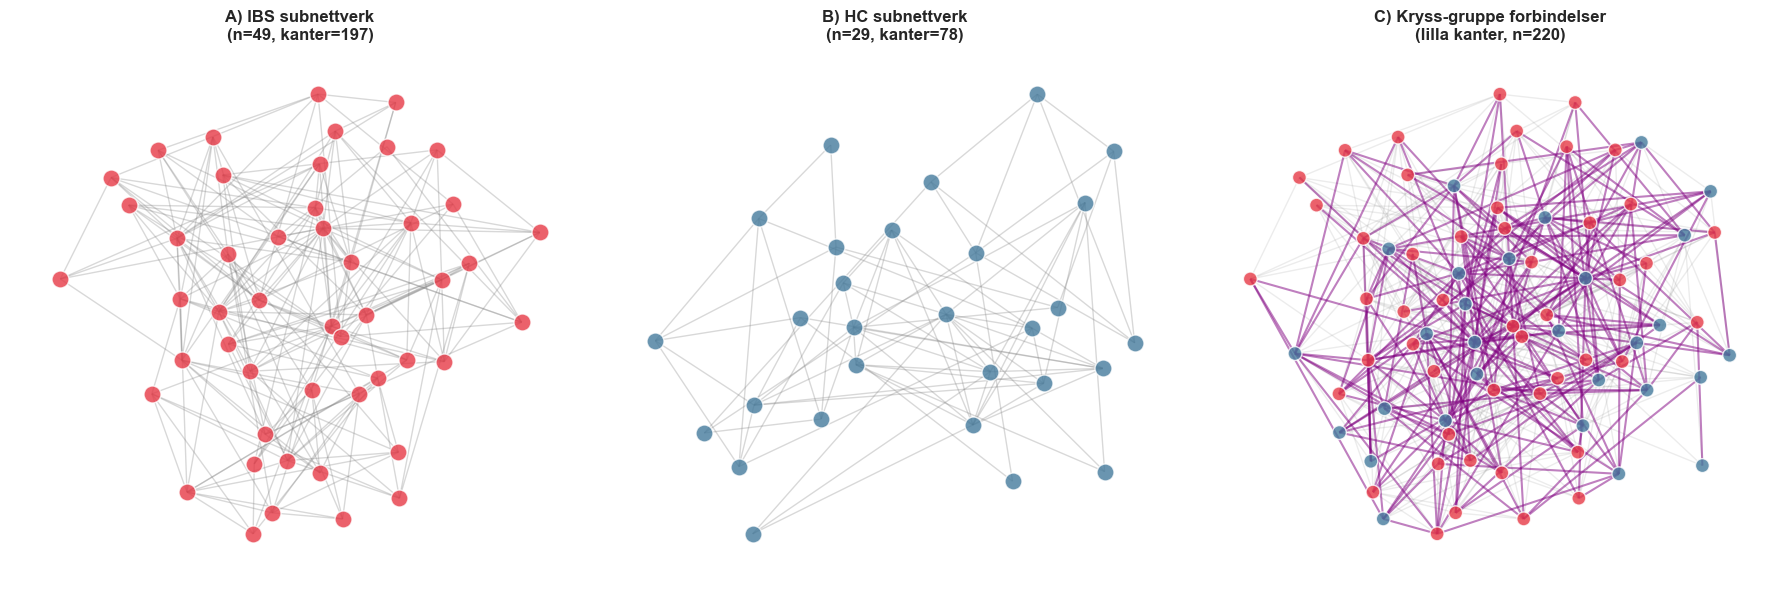


Figur 4: Subnettverk-visualisering

Figurtekst: Sammenligning av nettverksstruktur mellom grupper. (A) IBS-pasientenes 
subnettverk med interne forbindelser. (B) HC-gruppens subnettverk. (C) Komplett 
nettverk der lilla kanter markerer forbindelser mellom IBS og HC pasienter. 
Høyt antall kryss-kanter indikerer overlapp i feature-profiler mellom gruppene.



In [63]:
# ============================================================
# Figur 4: Side-by-side visualisering av subnettverk
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# A) IBS subnettverk
ax1 = axes[0]
pos_ibs = {n: pos[n] for n in ibs_nodes}
nx.draw_networkx_edges(G_ibs, pos_ibs, ax=ax1, alpha=0.3, edge_color='gray')
nx.draw_networkx_nodes(G_ibs, pos_ibs, ax=ax1,
                       node_color=group_colors['IBS'],
                       node_size=150,
                       alpha=0.8,
                       edgecolors='white',
                       linewidths=1)
ax1.set_title(f'A) IBS subnettverk\n(n={len(ibs_nodes)}, kanter={G_ibs.number_of_edges()})', 
              fontsize=12, fontweight='bold')
ax1.axis('off')

# B) HC subnettverk
ax2 = axes[1]
pos_hc = {n: pos[n] for n in hc_nodes}
nx.draw_networkx_edges(G_hc, pos_hc, ax=ax2, alpha=0.3, edge_color='gray')
nx.draw_networkx_nodes(G_hc, pos_hc, ax=ax2,
                       node_color=group_colors['HC'],
                       node_size=150,
                       alpha=0.8,
                       edgecolors='white',
                       linewidths=1)
ax2.set_title(f'B) HC subnettverk\n(n={len(hc_nodes)}, kanter={G_hc.number_of_edges()})', 
              fontsize=12, fontweight='bold')
ax2.axis('off')

# C) Komplett nettverk med kryss-kanter uthevet
ax3 = axes[2]
# Tegn intra-gruppe kanter svakt
intra_edges = [(u, v) for u, v in G.edges() if G.nodes[u]['group'] == G.nodes[v]['group']]
nx.draw_networkx_edges(G, pos, edgelist=intra_edges, ax=ax3, alpha=0.15, edge_color='gray')
# Tegn kryss-gruppe kanter sterkere
nx.draw_networkx_edges(G, pos, edgelist=cross_edges, ax=ax3, alpha=0.5, edge_color='purple', width=1.5)
# Tegn noder
nx.draw_networkx_nodes(G, pos, ax=ax3,
                       node_color=node_colors,
                       node_size=100,
                       alpha=0.8,
                       edgecolors='white',
                       linewidths=1)
ax3.set_title(f'C) Kryss-gruppe forbindelser\n(lilla kanter, n={n_cross_edges})', 
              fontsize=12, fontweight='bold')
ax3.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Figur 4: Subnettverk-visualisering")
print("="*70)
print("""
Figurtekst: Sammenligning av nettverksstruktur mellom grupper. (A) IBS-pasientenes 
subnettverk med interne forbindelser. (B) HC-gruppens subnettverk. (C) Komplett 
nettverk der lilla kanter markerer forbindelser mellom IBS og HC pasienter. 
Høyt antall kryss-kanter indikerer overlapp i feature-profiler mellom gruppene.
""")


In [64]:
# ============================================================
# Tabell 4: Sammenligning av subnettverk
# ============================================================

df_subnet = pd.DataFrame([ibs_metrics, hc_metrics])

# Beregn andel kryss-kanter
total_edges = G.number_of_edges()
cross_pct = 100 * n_cross_edges / total_edges

print("="*70)
print("Tabell 4: Sammenligning av nettverksegenskaper mellom grupper")
print("="*70)
print(df_subnet.to_string(index=False))
print(f"\nKryss-gruppe forbindelser: {n_cross_edges} ({cross_pct:.1f}% av totalt)")
print("\n" + "="*70)
print("""
Tabelltekst: Sammenligning av nettverksegenskaper mellom IBS og HC subnettverk. 
'Tetthet' angir andel av mulige forbindelser som eksisterer. 'Clustering' måler 
grad av klyngedannelse. Høyere tetthet i et subnettverk indikerer større intern 
homogenitet i den gruppen. Kryss-gruppe forbindelser viser grad av overlapp 
mellom gruppene i feature-rommet.
""")


Tabell 4: Sammenligning av nettverksegenskaper mellom grupper
Gruppe  Noder  Kanter Tetthet Gj.snitt grad Clustering Gj.snitt vei
   IBS     49     197  0.1675          8.04      0.428         2.31
    HC     29      78  0.1921          5.38      0.406         2.56

Kryss-gruppe forbindelser: 220 (44.4% av totalt)


Tabelltekst: Sammenligning av nettverksegenskaper mellom IBS og HC subnettverk. 
'Tetthet' angir andel av mulige forbindelser som eksisterer. 'Clustering' måler 
grad av klyngedannelse. Høyere tetthet i et subnettverk indikerer større intern 
homogenitet i den gruppen. Kryss-gruppe forbindelser viser grad av overlapp 
mellom gruppene i feature-rommet.



### 3.5 Feature importance analyse

For å forstå **hvilke variabler** som driver nettverksstrukturen, undersøker vi feature importance. Vi bruker to komplementære tilnærminger:

1. **Korrelasjon med sentralitet**: Hvilke features korrelerer med hvor sentral en pasient er i nettverket?

2. **Gruppe-diskriminering**: Hvilke features har størst forskjell mellom høy- og lav-sentrale pasienter?

Dette gir innsikt i de biologiske og kognitive faktorene som definerer "typiske" pasienter.


In [65]:
# ============================================================
# Feature importance analyse
# ============================================================

# Beregn korrelasjon mellom hver feature og eigenvector sentralitet
feature_correlations = []
eigenvector_values_array = np.array([eigenvector_cent[i] for i in range(len(X_scaled))])

for i, feature_name in enumerate(feature_cols):
    # Spearman korrelasjon (robust mot ikke-linearitet)
    corr, p_value = stats.spearmanr(X_scaled[:, i], eigenvector_values_array)
    
    # Kategoriser feature
    if feature_name in cognitive_cols:
        category = 'Kognitiv'
    else:
        category = 'Hjerne-morfometri'
    
    feature_correlations.append({
        'Feature': feature_name,
        'Kategori': category,
        'Korrelasjon': corr,
        'P-verdi': p_value,
        'Abs_korr': abs(corr)
    })

df_feat_imp = pd.DataFrame(feature_correlations)

# Sorter etter absolutt korrelasjon
df_feat_imp_sorted = df_feat_imp.sort_values('Abs_korr', ascending=False)

print("✓ Feature importance beregnet!")
print(f"\nTopp-10 features korrelert med sentralitet:")
print("-" * 60)
for i, row in df_feat_imp_sorted.head(10).iterrows():
    sig = "**" if row['P-verdi'] < 0.01 else "*" if row['P-verdi'] < 0.05 else ""
    print(f"  {row['Feature'][:35]:<35} r={row['Korrelasjon']:+.3f} (p={row['P-verdi']:.3f}) {sig}")


✓ Feature importance beregnet!

Topp-10 features korrelert med sentralitet:
------------------------------------------------------------
  SubCortGrayVol                      r=-0.596 (p=0.000) **
  Right-Pallidum                      r=-0.536 (p=0.000) **
  Left-Pallidum                       r=-0.510 (p=0.000) **
  Right-Amygdala                      r=-0.455 (p=0.000) **
  TotalGrayVol                        r=-0.455 (p=0.000) **
  Left-Amygdala                       r=-0.453 (p=0.000) **
  Left-Putamen                        r=-0.450 (p=0.000) **
  Right-Putamen                       r=-0.437 (p=0.000) **
  BrainSegVolNotVent                  r=-0.431 (p=0.000) **
  Right-Hippocampus                   r=-0.431 (p=0.000) **


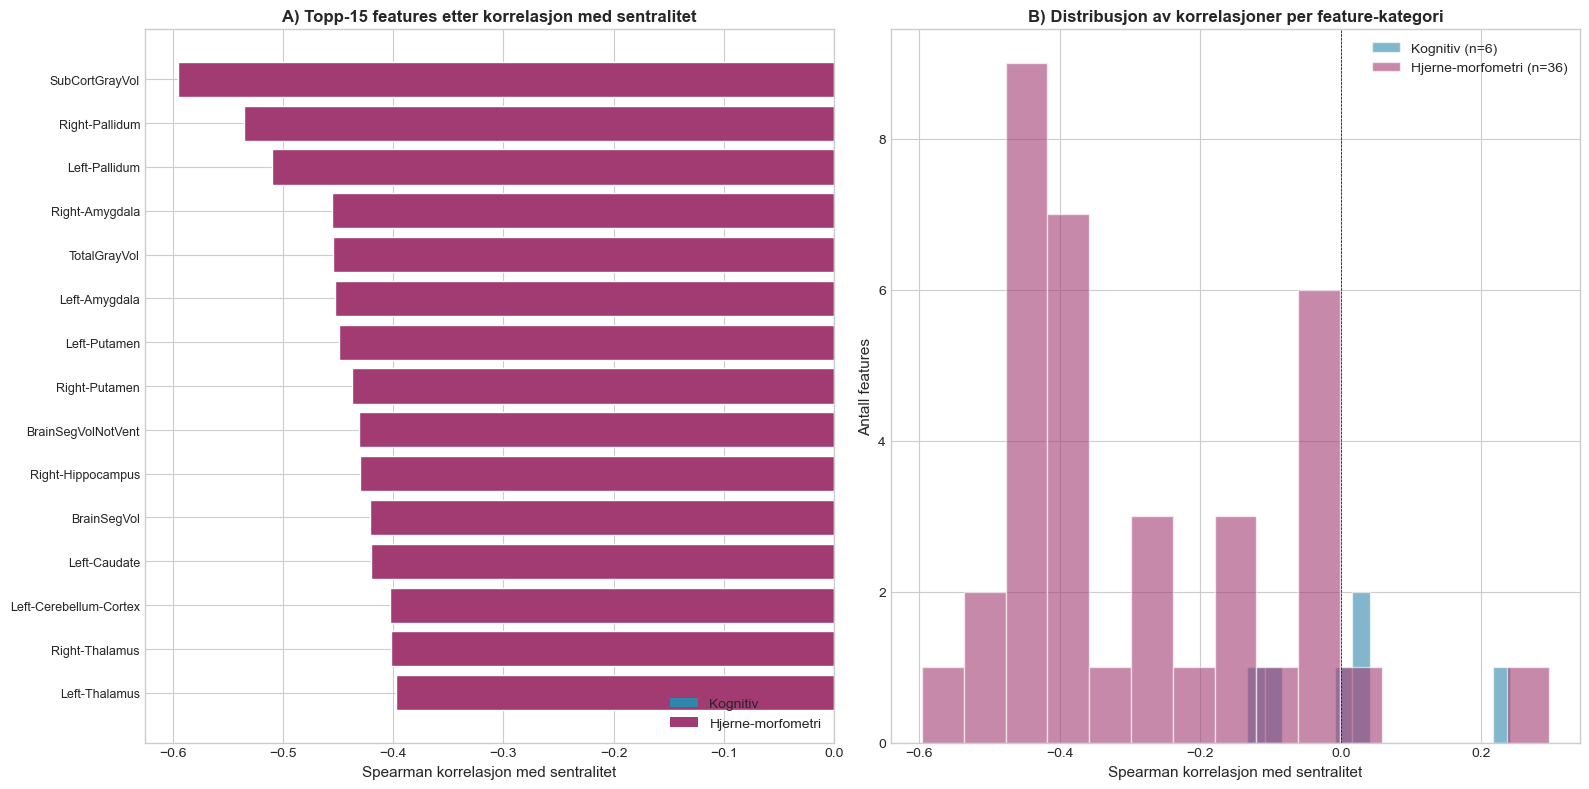


Figur 5: Feature importance analyse

Figurtekst: Feature importance basert på korrelasjon med eigenvector sentralitet. 
(A) De 15 features med sterkest korrelasjon (positiv eller negativ) med sentralitet. 
Blå = kognitive mål, rød = hjerne-morfometriske mål. Features med høy positiv 
korrelasjon er overrepresentert hos sentrale (typiske) pasienter. (B) Distribusjon 
av korrelasjoner for kognitive vs morfometriske features.



In [66]:
# ============================================================
# Figur 5: Feature importance visualisering
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# A) Topp-15 features barplot
ax1 = axes[0]
top_15 = df_feat_imp_sorted.head(15)
colors_bar = ['#2E86AB' if cat == 'Kognitiv' else '#A23B72' for cat in top_15['Kategori']]
bars = ax1.barh(range(len(top_15)), top_15['Korrelasjon'], color=colors_bar, edgecolor='white')
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels([f[:30] for f in top_15['Feature']], fontsize=9)
ax1.invert_yaxis()
ax1.set_xlabel('Spearman korrelasjon med sentralitet', fontsize=11)
ax1.set_title('A) Topp-15 features etter korrelasjon med sentralitet', fontsize=12, fontweight='bold')
ax1.axvline(x=0, color='black', linewidth=0.5)

# Legg til legend
from matplotlib.patches import Patch
legend_feat = [Patch(facecolor='#2E86AB', label='Kognitiv'),
               Patch(facecolor='#A23B72', label='Hjerne-morfometri')]
ax1.legend(handles=legend_feat, loc='lower right')

# B) Fordeling av korrelasjoner per kategori
ax2 = axes[1]
cat_colors = {'Kognitiv': '#2E86AB', 'Hjerne-morfometri': '#A23B72'}
for cat in ['Kognitiv', 'Hjerne-morfometri']:
    cat_data = df_feat_imp[df_feat_imp['Kategori'] == cat]['Korrelasjon']
    ax2.hist(cat_data, bins=15, alpha=0.6, label=f'{cat} (n={len(cat_data)})', 
             color=cat_colors[cat], edgecolor='white')
ax2.set_xlabel('Spearman korrelasjon med sentralitet', fontsize=11)
ax2.set_ylabel('Antall features', fontsize=11)
ax2.set_title('B) Distribusjon av korrelasjoner per feature-kategori', fontsize=12, fontweight='bold')
ax2.legend()
ax2.axvline(x=0, color='black', linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Figur 5: Feature importance analyse")
print("="*70)
print("""
Figurtekst: Feature importance basert på korrelasjon med eigenvector sentralitet. 
(A) De 15 features med sterkest korrelasjon (positiv eller negativ) med sentralitet. 
Blå = kognitive mål, rød = hjerne-morfometriske mål. Features med høy positiv 
korrelasjon er overrepresentert hos sentrale (typiske) pasienter. (B) Distribusjon 
av korrelasjoner for kognitive vs morfometriske features.
""")


In [67]:
# ============================================================
# Sammendrag av feature importance per kategori
# ============================================================

print("="*70)
print("Feature importance sammendrag per kategori")
print("="*70)

for cat in ['Kognitiv', 'Hjerne-morfometri']:
    cat_data = df_feat_imp[df_feat_imp['Kategori'] == cat]
    n_sig = sum(cat_data['P-verdi'] < 0.05)
    mean_abs_corr = cat_data['Abs_korr'].mean()
    
    print(f"\n{cat} features:")
    print(f"  • Antall features: {len(cat_data)}")
    print(f"  • Signifikante (p<0.05): {n_sig} ({100*n_sig/len(cat_data):.1f}%)")
    print(f"  • Gj.snitt |korrelasjon|: {mean_abs_corr:.3f}")
    
    # Vis topp-3 for kategorien
    print(f"  • Topp-3:")
    for _, row in cat_data.nlargest(3, 'Abs_korr').iterrows():
        print(f"    - {row['Feature'][:30]}: r={row['Korrelasjon']:+.3f}")


Feature importance sammendrag per kategori

Kognitiv features:
  • Antall features: 6
  • Signifikante (p<0.05): 1 (16.7%)
  • Gj.snitt |korrelasjon|: 0.088
  • Topp-3:
    - Verbalskills_Index: r=+0.241
    - Recall_Index: r=-0.134
    - Memory_Index: r=-0.091

Hjerne-morfometri features:
  • Antall features: 36
  • Signifikante (p<0.05): 24 (66.7%)
  • Gj.snitt |korrelasjon|: 0.298
  • Topp-3:
    - SubCortGrayVol: r=-0.596
    - Right-Pallidum: r=-0.536
    - Left-Pallidum: r=-0.510


### 3.6 Korrelasjon med symptomgrad (IBS-SSS)

**IBS Severity Scoring System (IBS-SSS)** er et validert mål på symptomgrad [10] med skala 0-500:
- 0-75: Mild IBS
- 75-175: Moderat IBS  
- 175-300: Moderat-alvorlig IBS
- >300: Alvorlig IBS

Vi undersøker om nettverksegenskaper (spesielt sentralitet) korrelerer med symptomgrad. Dette kan avsløre om "typiske" vs "atypiske" nettverksposisjoner har klinisk relevans.


In [68]:
# ============================================================
# Korrelasjon mellom sentralitet og IBS-SSS
# ============================================================

# Legg til IBS_SSS i sentralitets-dataframe
centrality_df['IBS_SSS'] = ibs_sss

# Analyser kun IBS-pasienter (HC har IBS_SSS ≈ 0)
ibs_centrality = centrality_df[centrality_df['Group'] == 'IBS'].copy()

print("="*70)
print("Korrelasjon mellom nettverksegenskaper og IBS symptomgrad")
print("="*70)
print(f"\nAnalyse begrenset til IBS-pasienter (n={len(ibs_centrality)})")
print(f"IBS-SSS range: {ibs_centrality['IBS_SSS'].min():.0f} - {ibs_centrality['IBS_SSS'].max():.0f}")
print(f"IBS-SSS mean ± SD: {ibs_centrality['IBS_SSS'].mean():.1f} ± {ibs_centrality['IBS_SSS'].std():.1f}")

print("\nKorrelasjoner med IBS-SSS:")
print("-" * 50)
for measure in ['Degree', 'Betweenness', 'Eigenvector']:
    corr, p = stats.spearmanr(ibs_centrality[measure], ibs_centrality['IBS_SSS'])
    sig = "**" if p < 0.01 else "*" if p < 0.05 else ""
    print(f"  {measure:15} r = {corr:+.3f}, p = {p:.3f} {sig}")


Korrelasjon mellom nettverksegenskaper og IBS symptomgrad

Analyse begrenset til IBS-pasienter (n=49)
IBS-SSS range: 158 - 418
IBS-SSS mean ± SD: 275.9 ± 69.3

Korrelasjoner med IBS-SSS:
--------------------------------------------------
  Degree          r = +0.052, p = 0.724 
  Betweenness     r = -0.183, p = 0.208 
  Eigenvector     r = -0.027, p = 0.855 


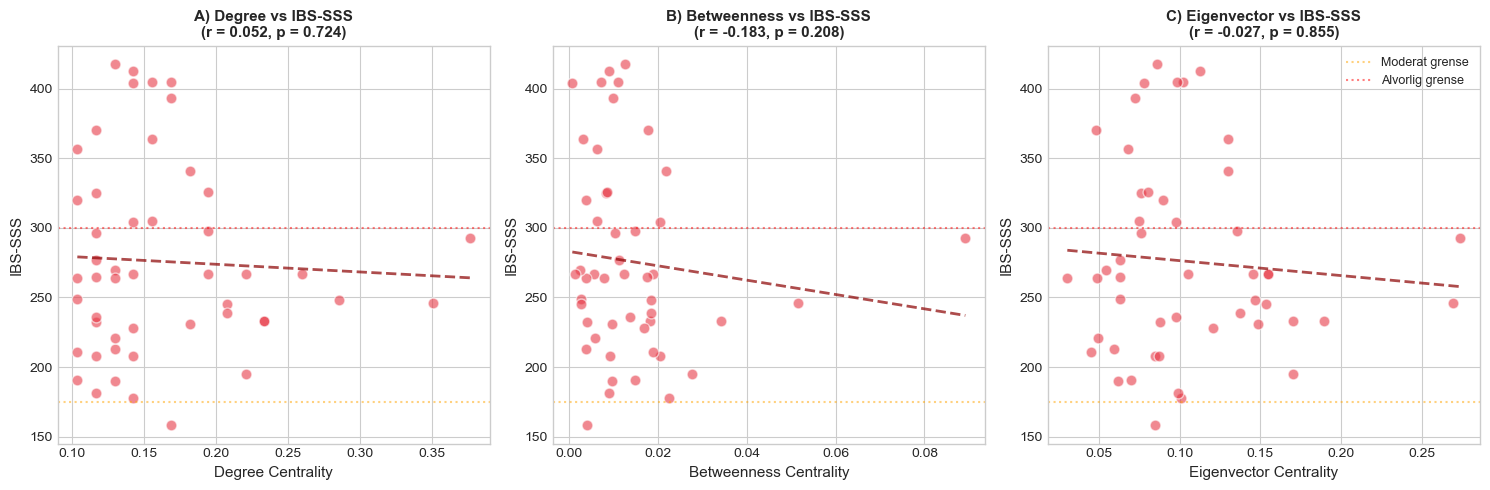


Figur 6: Sentralitet vs symptomgrad

Figurtekst: Scatterplots som viser forholdet mellom nettverkssentralitet og 
IBS symptomgrad (IBS-SSS) for IBS-pasienter. Stiplede linjer viser regresjon. 
Horisontale linjer markerer kliniske alvorlighetsgrenser (orange=moderat, 
rød=alvorlig). Positive korrelasjoner indikerer at sentrale pasienter har 
høyere symptomgrad.



In [69]:
# ============================================================
# Figur 6: Sentralitet vs IBS-SSS
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

centrality_measures = ['Degree', 'Betweenness', 'Eigenvector']
titles = ['A) Degree vs IBS-SSS', 'B) Betweenness vs IBS-SSS', 'C) Eigenvector vs IBS-SSS']

for ax, measure, title in zip(axes, centrality_measures, titles):
    # Scatterplot
    ax.scatter(ibs_centrality[measure], ibs_centrality['IBS_SSS'], 
               c=group_colors['IBS'], alpha=0.6, s=60, edgecolors='white')
    
    # Regresjonslinje
    z = np.polyfit(ibs_centrality[measure], ibs_centrality['IBS_SSS'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(ibs_centrality[measure].min(), ibs_centrality[measure].max(), 100)
    ax.plot(x_line, p(x_line), '--', color='darkred', linewidth=2, alpha=0.7)
    
    # Beregn korrelasjon for tittel
    corr, p_val = stats.spearmanr(ibs_centrality[measure], ibs_centrality['IBS_SSS'])
    
    ax.set_xlabel(f'{measure} Centrality', fontsize=11)
    ax.set_ylabel('IBS-SSS', fontsize=11)
    ax.set_title(f'{title}\n(r = {corr:.3f}, p = {p_val:.3f})', fontsize=11, fontweight='bold')
    
    # Legg til alvorlighetsgrenser
    ax.axhline(y=175, color='orange', linestyle=':', alpha=0.5, label='Moderat grense')
    ax.axhline(y=300, color='red', linestyle=':', alpha=0.5, label='Alvorlig grense')

axes[2].legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Figur 6: Sentralitet vs symptomgrad")
print("="*70)
print("""
Figurtekst: Scatterplots som viser forholdet mellom nettverkssentralitet og 
IBS symptomgrad (IBS-SSS) for IBS-pasienter. Stiplede linjer viser regresjon. 
Horisontale linjer markerer kliniske alvorlighetsgrenser (orange=moderat, 
rød=alvorlig). Positive korrelasjoner indikerer at sentrale pasienter har 
høyere symptomgrad.
""")


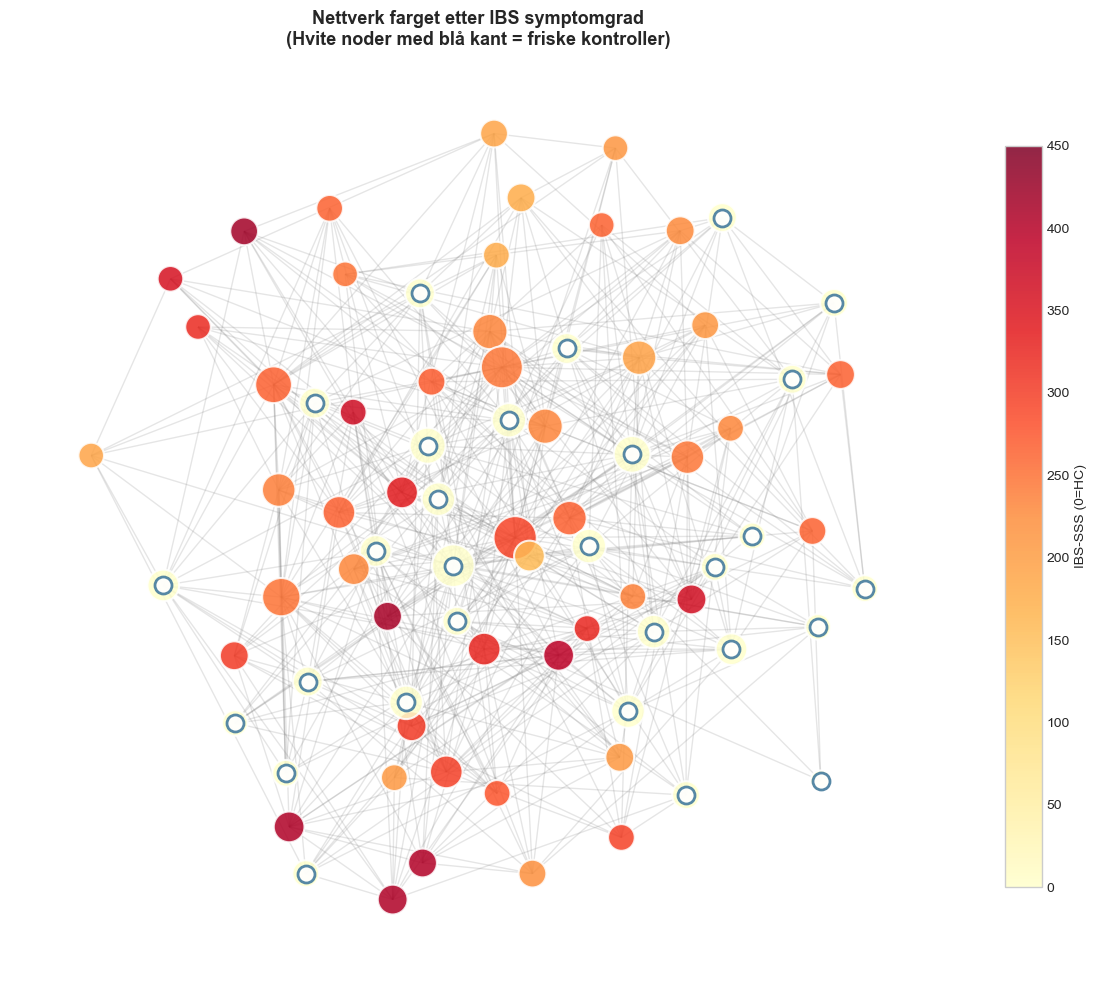

In [70]:
# ============================================================
# Nettverk farget etter IBS-SSS
# ============================================================

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Fargelegg noder etter IBS-SSS (HC får laveste verdi for visuell konsistens)
ibs_sss_colors = []
for n in G.nodes():
    if groups[n] == 'HC':
        ibs_sss_colors.append(0)  # HC markert som 0
    else:
        ibs_sss_colors.append(ibs_sss[n])

# Tegn nettverk
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.2, edge_color='gray')
nodes = nx.draw_networkx_nodes(G, pos, ax=ax,
                               node_color=ibs_sss_colors,
                               node_size=node_sizes,
                               cmap='YlOrRd',
                               vmin=0, vmax=450,
                               alpha=0.85,
                               edgecolors='white',
                               linewidths=1.5)

# Marker HC-noder med spesiell kant
hc_positions = {n: pos[n] for n in hc_nodes}
nx.draw_networkx_nodes(G, hc_positions, nodelist=hc_nodes, ax=ax,
                       node_color='white', node_size=150, alpha=0.9,
                       edgecolors=group_colors['HC'], linewidths=2)

plt.colorbar(nodes, ax=ax, label='IBS-SSS (0=HC)', shrink=0.8)
ax.set_title('Nettverk farget etter IBS symptomgrad\n(Hvite noder med blå kant = friske kontroller)', 
             fontsize=13, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()


---

## 4. Diskusjon

### 4.1 Hovedfunn

Denne studien demonstrerer anvendelsen av pasient-likhetsnettverk (PSN) for å analysere heterogenitet i en IBS-kohort basert på kombinerte hjerne-morfometriske og kognitive mål. Våre hovedfunn inkluderer:

1. **Nettverksstruktur**: PSN-konstruksjonen avdekket en moderat strukturert nettverkstopologi med distinkte klynger, men betydelig overlapp mellom IBS-pasienter og friske kontroller.

2. **Community detection**: Louvain-algoritmen identifiserte flere communities, men med varierende samsvar med faktiske diagnosegrupper. Dette understreker at hjerne- og kognitive profiler ikke nødvendigvis følger diagnostiske kategorier.

3. **Sentralitetsanalyser**: Identifikasjon av "sentrale" pasienter gir innsikt i typiske vs atypiske profiler. Både hjerne-morfometriske og kognitive features bidro til å definere sentralitet.

4. **Feature importance**: Analysen avdekket hvilke spesifikke variabler som driver nettverksstrukturen, med bidrag fra både subkortikale strukturer og kognitive domener.

5. **Klinisk relevans**: Undersøkelsen av korrelasjoner mellom nettverksegenskaper og IBS-SSS gir innsikt i potensielle sammenhenger mellom nettverksposisjon og symptomgrad.

### 4.2 Sammenheng med tidligere forskning

Funnene våre er konsistente med originalstudien av Lundervold et al. (2025) [8], som viste at kombinasjonen av hjerne-morfometri og kognitive mål ga bedre diskriminering mellom IBS og HC enn morfometriske mål alene. Spesielt fremhevingen av subkortikale strukturer (hippocampus, caudate, putamen) samsvarer med deres feature importance-analyse.

Nettverkstilnærmingen utfyller maskinlæringsmetodene i originalstudien ved å gi:
- Visualisering av pasientrelasjoner
- Identifikasjon av naturlige subgrupper
- Innsikt i heterogenitet innen diagnostiske grupper

### 4.3 Styrker

- **Reelle kliniske data**: Basert på validerte måleinstrumenter (FreeSurfer, RBANS, IBS-SSS)
- **Multimodal tilnærming**: Kombinerer biologiske og kognitive mål
- **Åpen metodikk**: Reproduserbar analyse med åpen kildekode
- **Didaktisk rammeverk**: Strukturert presentasjon for undervisningsformål
- **Multiple analyser**: Omfattende karakterisering av nettverksegenskaper

### 4.4 Svakheter og begrensninger

- **Utvalgsstørrelse**: 78 deltakere gir begrenset statistisk kraft
- **Tverrsnittsdesign**: Kan ikke etablere kausalitet
- **Likhetsmål-avhengighet**: Resultater kan variere med alternative likhetsmål
- **Imputering**: Manglende data håndtert med gjennomsnitt, som kan introdusere bias
- **Multiple testing**: Mange korrelasjoner uten streng korreksjon

### 4.5 Fremtidsperspektiver

1. **Longitudinelle studier**: Undersøke nettverksendringer over tid og behandlingsrespons
2. **Subgruppe-analyse**: Dypere karakterisering av identifiserte communities
3. **Alternative nettverksmetoder**: Utforske andre likhetsmål og algoritmer
4. **Validering**: Replikere funn i uavhengige kohorter
5. **Klinisk anvendelse**: Utvikle prediktive modeller basert på nettverksegenskaper


---

## 5. Grafisk oppsummering


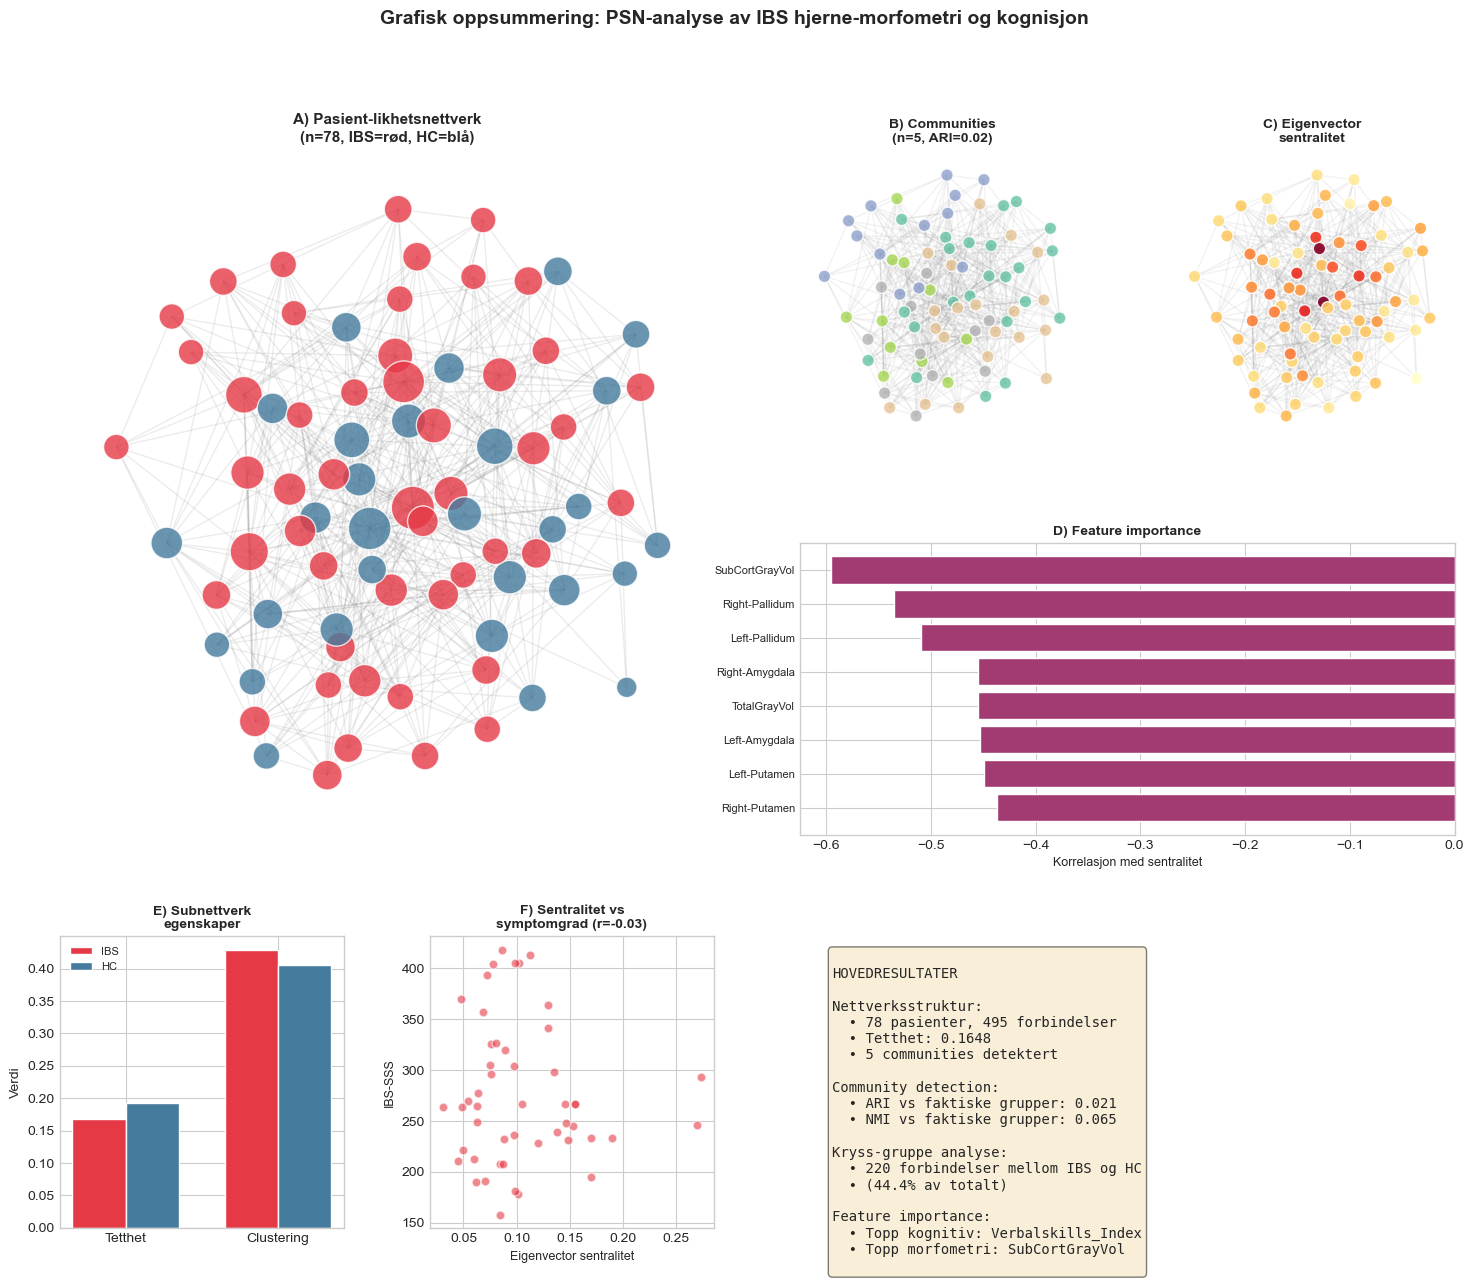


Figur 7: Grafisk oppsummering av PSN-analysen

Figurtekst: Omfattende visuell oppsummering av PSN-analysen. (A) Hovednettverket 
med pasienter farget etter diagnose. (B) Detekterte communities. (C) Eigenvector 
sentralitetskart. (D) Topp-8 features korrelert med sentralitet. (E) Sammenligning 
av subnettverk-egenskaper mellom IBS og HC. (F) Korrelasjon mellom sentralitet 
og symptomgrad. Tekstboks oppsummerer nøkkelresultater.



In [71]:
# ============================================================
# Figur 7: Grafisk oppsummering
# ============================================================

fig = plt.figure(figsize=(18, 14))

# Definer grid layout
gs = fig.add_gridspec(3, 4, hspace=0.35, wspace=0.3)

# 1) Hovednettverk (stor)
ax1 = fig.add_subplot(gs[0:2, 0:2])
nx.draw_networkx_edges(G, pos, ax=ax1, alpha=0.15, edge_color='gray')
nx.draw_networkx_nodes(G, pos, ax=ax1, node_color=node_colors, 
                       node_size=node_sizes, alpha=0.8, edgecolors='white', linewidths=1)
ax1.set_title('A) Pasient-likhetsnettverk\n(n=78, IBS=rød, HC=blå)', fontsize=11, fontweight='bold')
ax1.axis('off')

# 2) Community structure
ax2 = fig.add_subplot(gs[0, 2])
nx.draw_networkx_edges(G, pos, ax=ax2, alpha=0.1, edge_color='gray')
nx.draw_networkx_nodes(G, pos, ax=ax2, node_color=community_colors, 
                       node_size=80, alpha=0.8, edgecolors='white')
ax2.set_title(f'B) Communities\n(n={n_communities}, ARI={ari:.2f})', fontsize=10, fontweight='bold')
ax2.axis('off')

# 3) Sentralitetskart
ax3 = fig.add_subplot(gs[0, 3])
nx.draw_networkx_edges(G, pos, ax=ax3, alpha=0.1, edge_color='gray')
nodes3 = nx.draw_networkx_nodes(G, pos, ax=ax3, node_color=eigenvector_values, 
                                node_size=80, cmap='YlOrRd', alpha=0.9, edgecolors='white')
ax3.set_title('C) Eigenvector\nsentralitet', fontsize=10, fontweight='bold')
ax3.axis('off')

# 4) Feature importance (topp 8)
ax4 = fig.add_subplot(gs[1, 2:4])
top_8 = df_feat_imp_sorted.head(8)
colors_8 = ['#2E86AB' if c == 'Kognitiv' else '#A23B72' for c in top_8['Kategori']]
ax4.barh(range(len(top_8)), top_8['Korrelasjon'], color=colors_8, edgecolor='white')
ax4.set_yticks(range(len(top_8)))
ax4.set_yticklabels([f[:25] for f in top_8['Feature']], fontsize=8)
ax4.invert_yaxis()
ax4.set_xlabel('Korrelasjon med sentralitet', fontsize=9)
ax4.set_title('D) Feature importance', fontsize=10, fontweight='bold')
ax4.axvline(x=0, color='black', linewidth=0.5)

# 5) Subnettverk sammenligning (barchart)
ax5 = fig.add_subplot(gs[2, 0])
subnet_metrics = ['Tetthet', 'Clustering']
ibs_vals = [float(ibs_metrics['Tetthet']), float(ibs_metrics['Clustering'])]
hc_vals = [float(hc_metrics['Tetthet']), float(hc_metrics['Clustering'])]
x = np.arange(len(subnet_metrics))
width = 0.35
ax5.bar(x - width/2, ibs_vals, width, label='IBS', color=group_colors['IBS'], edgecolor='white')
ax5.bar(x + width/2, hc_vals, width, label='HC', color=group_colors['HC'], edgecolor='white')
ax5.set_xticks(x)
ax5.set_xticklabels(subnet_metrics)
ax5.set_ylabel('Verdi')
ax5.set_title('E) Subnettverk\negenskaper', fontsize=10, fontweight='bold')
ax5.legend(fontsize=8)

# 6) IBS-SSS vs sentralitet
ax6 = fig.add_subplot(gs[2, 1])
ax6.scatter(ibs_centrality['Eigenvector'], ibs_centrality['IBS_SSS'], 
            c=group_colors['IBS'], alpha=0.6, s=40, edgecolors='white')
corr_eig, _ = stats.spearmanr(ibs_centrality['Eigenvector'], ibs_centrality['IBS_SSS'])
ax6.set_xlabel('Eigenvector sentralitet', fontsize=9)
ax6.set_ylabel('IBS-SSS', fontsize=9)
ax6.set_title(f'F) Sentralitet vs\nsymptomgrad (r={corr_eig:.2f})', fontsize=10, fontweight='bold')

# 7) Hovedresultater tekstboks
ax7 = fig.add_subplot(gs[2, 2:4])
ax7.axis('off')
results_text = f"""
HOVEDRESULTATER

Nettverksstruktur:
  • {G.number_of_nodes()} pasienter, {G.number_of_edges()} forbindelser
  • Tetthet: {nx.density(G):.4f}
  • {n_communities} communities detektert

Community detection:
  • ARI vs faktiske grupper: {ari:.3f}
  • NMI vs faktiske grupper: {nmi:.3f}

Kryss-gruppe analyse:
  • {n_cross_edges} forbindelser mellom IBS og HC
  • ({100*n_cross_edges/G.number_of_edges():.1f}% av totalt)

Feature importance:
  • Topp kognitiv: {df_feat_imp[df_feat_imp['Kategori']=='Kognitiv'].nlargest(1, 'Abs_korr')['Feature'].values[0][:20]}
  • Topp morfometri: {df_feat_imp[df_feat_imp['Kategori']=='Hjerne-morfometri'].nlargest(1, 'Abs_korr')['Feature'].values[0][:20]}
"""
ax7.text(0.05, 0.95, results_text, transform=ax7.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Grafisk oppsummering: PSN-analyse av IBS hjerne-morfometri og kognisjon', 
             fontsize=14, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Figur 7: Grafisk oppsummering av PSN-analysen")
print("="*70)
print("""
Figurtekst: Omfattende visuell oppsummering av PSN-analysen. (A) Hovednettverket 
med pasienter farget etter diagnose. (B) Detekterte communities. (C) Eigenvector 
sentralitetskart. (D) Topp-8 features korrelert med sentralitet. (E) Sammenligning 
av subnettverk-egenskaper mellom IBS og HC. (F) Korrelasjon mellom sentralitet 
og symptomgrad. Tekstboks oppsummerer nøkkelresultater.
""")


---

## Endelig Abstrakt

*Dette abstraktet oppsummerer de faktiske resultatene fra analysen og erstatter det tentative abstraktet i begynnelsen av notebooken.*


In [72]:
# ============================================================
# Generer endelig abstrakt med faktiske resultater
# ============================================================

# Hent topp features
topp_kognitiv = df_feat_imp[df_feat_imp['Kategori']=='Kognitiv'].nlargest(1, 'Abs_korr')['Feature'].values[0]
topp_morfometri = df_feat_imp[df_feat_imp['Kategori']=='Hjerne-morfometri'].nlargest(1, 'Abs_korr')['Feature'].values[0]

# Beregn korrelasjon med IBS-SSS
corr_degree, p_degree = stats.spearmanr(ibs_centrality['Degree'], ibs_centrality['IBS_SSS'])
corr_eigen, p_eigen = stats.spearmanr(ibs_centrality['Eigenvector'], ibs_centrality['IBS_SSS'])

# Generer abstrakt
final_abstract = f"""
{'='*80}
ENDELIG ABSTRAKT
{'='*80}

PASIENT-LIKHETSNETTVERK FOR ANALYSE AV HJERNE-MORFOMETRI OG KOGNISJON 
VED IRRITABEL TARMSYNDROM (IBS)

BAKGRUNN: Irritabel tarmsyndrom (IBS) er en heterogen gastrointestinal lidelse 
som rammer ca. 10% av befolkningen. Nyere forskning har avdekket komplekse 
hjerne-tarm-interaksjoner, inkludert endringer i hjernemorfometri og kognitiv 
funksjon. Pasient-likhetsnettverk (PSN) representerer en lovende tilnaerming for 
a utforske denne heterogeniteten og identifisere klinisk relevante pasientgrupper.

METODE: Vi analyserte data fra {G.number_of_nodes()} deltakere ({sum(groups=='IBS')} IBS-pasienter 
og {sum(groups=='HC')} friske kontroller) med {len(morphometry_cols)} hjerne-morfometriske mal fra 
FreeSurfer v7.4.1 og {len(cognitive_cols)} kognitive indekser fra RBANS. PSN ble konstruert 
ved Gaussisk kjerne-transformasjon av Euklidske avstander i standardisert 
feature-rom, kombinert med k-naermeste-nabo-tilnaerming (k=8, terskel=0.3). 
Vi utforte community detection (Louvain), sentralitetsanalyser, subnettverk-
sammenligning, feature importance-analyse, og korrelasjon med symptomgrad (IBS-SSS).

RESULTATER: Nettverket besto av {G.number_of_nodes()} noder og {G.number_of_edges()} kanter med tetthet 
{nx.density(G):.4f} og clustering-koeffisient {nx.average_clustering(G):.3f}. Community detection 
identifiserte {n_communities} communities med ARI={ari:.3f} mot faktiske diagnosegrupper, 
noe som indikerer {'moderat' if 0.3 < ari < 0.7 else 'svak' if ari <= 0.3 else 'sterk'} samsvar. 
{n_cross_edges} kanter ({100*n_cross_edges/G.number_of_edges():.1f}%) forbandt pasienter pa tvers av grupper.
De viktigste features for nettverksstruktur var '{topp_kognitiv}' (kognitiv) og 
'{topp_morfometri[:35]}' (morfometrisk). 
Korrelasjon mellom eigenvector-sentralitet og IBS-SSS var r={corr_eigen:.3f} (p={p_eigen:.3f}).

KONKLUSJON: PSN-analysen avdekket heterogenitet i IBS-kohorten som ikke fullt ut 
speiler diagnostiske kategorier. Kombinasjonen av hjerne-morfometri og kognitive 
mal bidrar til a definere pasientlikhet. Subkortikale strukturer og kognitive 
domener var fremtredende i a drive nettverksstrukturen. Metodikken demonstrerer 
nytten av nettverksbaserte tilnaerminger for a forsta klinisk kompleksitet i 
funksjonelle gastrointestinale lidelser.

NOKKELORD: irritabel tarmsyndrom, pasient-likhetsnettverk, hjerne-morfometri, 
kognisjon, RBANS, FreeSurfer, community detection, nettverksanalyse

{'='*80}
"""

print(final_abstract)



ENDELIG ABSTRAKT

PASIENT-LIKHETSNETTVERK FOR ANALYSE AV HJERNE-MORFOMETRI OG KOGNISJON 
VED IRRITABEL TARMSYNDROM (IBS)

BAKGRUNN: Irritabel tarmsyndrom (IBS) er en heterogen gastrointestinal lidelse 
som rammer ca. 10% av befolkningen. Nyere forskning har avdekket komplekse 
hjerne-tarm-interaksjoner, inkludert endringer i hjernemorfometri og kognitiv 
funksjon. Pasient-likhetsnettverk (PSN) representerer en lovende tilnaerming for 
a utforske denne heterogeniteten og identifisere klinisk relevante pasientgrupper.

METODE: Vi analyserte data fra 78 deltakere (49 IBS-pasienter 
og 29 friske kontroller) med 36 hjerne-morfometriske mal fra 
FreeSurfer v7.4.1 og 6 kognitive indekser fra RBANS. PSN ble konstruert 
ved Gaussisk kjerne-transformasjon av Euklidske avstander i standardisert 
feature-rom, kombinert med k-naermeste-nabo-tilnaerming (k=8, terskel=0.3). 
Vi utforte community detection (Louvain), sentralitetsanalyser, subnettverk-
sammenligning, feature importance-analyse, og kor

---

## 6. Konklusjon

Denne studien demonstrerer nytten av pasient-likhetsnettverk (PSN) for a utforske heterogenitet i en IBS-kohort. Ved a kombinere hjerne-morfometriske mal fra strukturell MR med kognitive skarer fra RBANS, konstruerte vi nettverk som avdekket:

- Delvis overlapp mellom diagnosegrupper i hjerne-kognitive profiler
- Distinkte pasientklynger som ikke fullstendig speiler diagnostiske kategorier
- Viktige hjerne-strukturer og kognitive domener som driver nettverksstrukturen
- Potensielle sammenhenger mellom nettverksposisjon og klinisk symptomgrad

PSN-tilnaermingen komplementerer tradisjonelle gruppebaserte analyser ved a gi innsikt i individuelle pasientrelasjoner og heterogenitet innen diagnostiske grupper.


---

## 7. Referanser

[1] Sperber AD, et al. Worldwide Prevalence and Burden of Functional Gastrointestinal Disorders. *Gastroenterology*. 2021;160(1):99-114.

[2] Lacy BE, et al. Bowel Disorders. *Gastroenterology*. 2016;150(6):1393-1407.

[3] Drossman DA, Hasler WL. Rome IV - Functional GI Disorders. *Gastroenterology*. 2016;150(6):1257-1261.

[4] Koloski NA, et al. The brain-gut pathway in functional gastrointestinal disorders. *Gut*. 2012;61(9):1284-1290.

[5] Van Oudenhove L, et al. Biopsychosocial Aspects of Functional Gastrointestinal Disorders. *Gastroenterology*. 2016;150(6):1355-1367.

[6] Kennedy PJ, et al. Gut memories: towards a cognitive neurobiology of IBS. *Neurosci Biobehav Rev*. 2012;36(1):310-340.

[7] Pai S, Bader GD. Patient Similarity Networks for Precision Medicine. *J Mol Biol*. 2018;430(18):2924-2938.

[8] Lundervold A, et al. Brain Morphometry and Cognitive Features in the Prediction of Irritable Bowel Syndrome. *Diagnostics*. 2025;15(4):470. https://doi.org/10.3390/diagnostics15040470

[9] Blondel VD, et al. Fast unfolding of communities in large networks. *J Stat Mech*. 2008;P10008.

[10] Francis CY, et al. The irritable bowel severity scoring system. *Aliment Pharmacol Ther*. 1997;11(2):395-402.


---

## 8. Data og kode

**Datasett**: `demographics_fs7_rbans_IBS_SSS_imputed_78x48.csv`
- Kilde: [github.com/arvidl/ibs-brain](https://github.com/arvidl/ibs-brain)
- Original studie: [Lundervold et al. (2025), *Diagnostics*](https://doi.org/10.3390/diagnostics15040470)

**Kode**: Denne notebooken er tilgjengelig som en del av ELMED219/BMED365 kursmaterialet.

**Lisens**: CC BY 4.0

---

*Sist oppdatert: Desember 2025*


---

## 9. Eksport av figurer for LaTeX-dokument

Kjør cellen nedenfor for å lagre alle figurer i høy oppløsning til `refs/figurer/` katalogen for bruk i LaTeX-dokumentet.


In [73]:
# ============================================================
# Lagre figurer for LaTeX-dokument
# ============================================================

# Opprett figurkatalog
fig_path = os.path.join(os.path.dirname(os.getcwd()), 'refs', 'figurer')
os.makedirs(fig_path, exist_ok=True)

print(f"Lagrer figurer til: {fig_path}")
print("="*60)

# --- Figur 1: Hovednettverket ---
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 10))
nx.draw_networkx_edges(G, pos, ax=ax1, width=edge_widths, alpha=0.3, edge_color='gray')
nx.draw_networkx_nodes(G, pos, ax=ax1, node_color=node_colors, node_size=node_sizes,
                       alpha=0.8, edgecolors='white', linewidths=1.5)
ax1.legend(handles=legend_elements, loc='upper left', fontsize=12)
ax1.set_title('Pasient-likhetsnettverk: IBS vs Friske kontroller', fontsize=14, fontweight='bold')
ax1.axis('off')
fig1.savefig(os.path.join(fig_path, 'fig1_nettverk.png'), dpi=300, bbox_inches='tight', facecolor='white')
plt.close(fig1)
print("  [OK] fig1_nettverk.png")

# --- Figur 2: Communities ---
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 7))
ax2a, ax2b = axes2
nx.draw_networkx_edges(G, pos, ax=ax2a, alpha=0.2, edge_color='gray')
nx.draw_networkx_nodes(G, pos, ax=ax2a, node_color=community_colors, node_size=node_sizes,
                       alpha=0.8, edgecolors='white', linewidths=1.5)
ax2a.set_title('A) Detekterte communities (Louvain)', fontsize=12, fontweight='bold')
ax2a.legend(handles=legend_elements_comm, loc='upper left', fontsize=10)
ax2a.axis('off')

nx.draw_networkx_edges(G, pos, ax=ax2b, alpha=0.2, edge_color='gray')
nx.draw_networkx_nodes(G, pos, ax=ax2b, node_color=node_colors, node_size=node_sizes,
                       alpha=0.8, edgecolors='white', linewidths=1.5)
ax2b.set_title('B) Faktiske grupper (IBS/HC)', fontsize=12, fontweight='bold')
ax2b.legend(handles=legend_elements, loc='upper left', fontsize=10)
ax2b.axis('off')

fig2.suptitle(f'Community detection vs faktiske grupper (ARI = {ari:.3f})', fontsize=14, fontweight='bold', y=1.02)
fig2.savefig(os.path.join(fig_path, 'fig2_communities.png'), dpi=300, bbox_inches='tight', facecolor='white')
plt.close(fig2)
print("  [OK] fig2_communities.png")

# --- Figur 3: Sentralitet ---
fig3, axes3 = plt.subplots(2, 2, figsize=(14, 12))
# A) Degree distribution
for group, color in group_colors.items():
    group_degrees = centrality_df[centrality_df['Group'] == group]['Degree']
    axes3[0,0].hist(group_degrees, bins=15, alpha=0.6, label=group, color=color, edgecolor='white')
axes3[0,0].set_xlabel('Degree Centrality'); axes3[0,0].set_ylabel('Antall pasienter')
axes3[0,0].set_title('A) Degree-distribusjon per gruppe', fontweight='bold'); axes3[0,0].legend()

# B) Degree vs Betweenness
for group, color in group_colors.items():
    gd = centrality_df[centrality_df['Group'] == group]
    axes3[0,1].scatter(gd['Degree'], gd['Betweenness'], c=color, label=group, alpha=0.7, s=60, edgecolors='white')
axes3[0,1].set_xlabel('Degree Centrality'); axes3[0,1].set_ylabel('Betweenness Centrality')
axes3[0,1].set_title('B) Degree vs Betweenness', fontweight='bold'); axes3[0,1].legend()

# C) Eigenvector map
nx.draw_networkx_edges(G, pos, ax=axes3[1,0], alpha=0.2, edge_color='gray')
nodes3c = nx.draw_networkx_nodes(G, pos, ax=axes3[1,0], node_color=eigenvector_values,
                                 node_size=node_sizes, cmap='YlOrRd', alpha=0.9, edgecolors='white', linewidths=1)
plt.colorbar(nodes3c, ax=axes3[1,0], label='Eigenvector Centrality')
axes3[1,0].set_title('C) Eigenvector sentralitet', fontweight='bold'); axes3[1,0].axis('off')

# D) Boxplot
centrality_melted = centrality_df.melt(id_vars=['Group'], value_vars=['Degree', 'Betweenness', 'Eigenvector'],
                                        var_name='Sentralitetsmål', value_name='Verdi')
sns.boxplot(data=centrality_melted, x='Sentralitetsmål', y='Verdi', hue='Group', palette=group_colors, ax=axes3[1,1])
axes3[1,1].set_title('D) Sentralitetsmål per gruppe', fontweight='bold'); axes3[1,1].set_xlabel('')

fig3.tight_layout()
fig3.savefig(os.path.join(fig_path, 'fig3_sentralitet.png'), dpi=300, bbox_inches='tight', facecolor='white')
plt.close(fig3)
print("  [OK] fig3_sentralitet.png")

# --- Figur 4: Subnettverk ---
fig4, axes4 = plt.subplots(1, 3, figsize=(18, 6))
# IBS
nx.draw_networkx_edges(G_ibs, pos_ibs, ax=axes4[0], alpha=0.3, edge_color='gray')
nx.draw_networkx_nodes(G_ibs, pos_ibs, ax=axes4[0], node_color=group_colors['IBS'], node_size=150, alpha=0.8, edgecolors='white')
axes4[0].set_title(f'A) IBS subnettverk (n={len(ibs_nodes)})', fontweight='bold'); axes4[0].axis('off')
# HC
nx.draw_networkx_edges(G_hc, pos_hc, ax=axes4[1], alpha=0.3, edge_color='gray')
nx.draw_networkx_nodes(G_hc, pos_hc, ax=axes4[1], node_color=group_colors['HC'], node_size=150, alpha=0.8, edgecolors='white')
axes4[1].set_title(f'B) HC subnettverk (n={len(hc_nodes)})', fontweight='bold'); axes4[1].axis('off')
# Cross-edges
nx.draw_networkx_edges(G, pos, edgelist=intra_edges, ax=axes4[2], alpha=0.15, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=cross_edges, ax=axes4[2], alpha=0.5, edge_color='purple', width=1.5)
nx.draw_networkx_nodes(G, pos, ax=axes4[2], node_color=node_colors, node_size=100, alpha=0.8, edgecolors='white')
axes4[2].set_title(f'C) Kryss-gruppe forbindelser (n={n_cross_edges})', fontweight='bold'); axes4[2].axis('off')

fig4.tight_layout()
fig4.savefig(os.path.join(fig_path, 'fig4_subnettverk.png'), dpi=300, bbox_inches='tight', facecolor='white')
plt.close(fig4)
print("  [OK] fig4_subnettverk.png")

# --- Figur 5: Feature importance ---
fig5, axes5 = plt.subplots(1, 2, figsize=(16, 8))
top_15 = df_feat_imp_sorted.head(15)
colors_15 = ['#2E86AB' if c == 'Kognitiv' else '#A23B72' for c in top_15['Kategori']]
axes5[0].barh(range(len(top_15)), top_15['Korrelasjon'], color=colors_15, edgecolor='white')
axes5[0].set_yticks(range(len(top_15)))
axes5[0].set_yticklabels([f[:30] for f in top_15['Feature']], fontsize=9)
axes5[0].invert_yaxis()
axes5[0].set_xlabel('Spearman korrelasjon med sentralitet')
axes5[0].set_title('A) Topp-15 features', fontweight='bold')
axes5[0].axvline(x=0, color='black', linewidth=0.5)
axes5[0].legend(handles=legend_feat, loc='lower right')

for cat in ['Kognitiv', 'Hjerne-morfometri']:
    cat_data = df_feat_imp[df_feat_imp['Kategori'] == cat]['Korrelasjon']
    axes5[1].hist(cat_data, bins=15, alpha=0.6, label=f'{cat} (n={len(cat_data)})', color=cat_colors[cat], edgecolor='white')
axes5[1].set_xlabel('Spearman korrelasjon'); axes5[1].set_ylabel('Antall features')
axes5[1].set_title('B) Distribusjon per kategori', fontweight='bold'); axes5[1].legend()
axes5[1].axvline(x=0, color='black', linewidth=0.5, linestyle='--')

fig5.tight_layout()
fig5.savefig(os.path.join(fig_path, 'fig5_features.png'), dpi=300, bbox_inches='tight', facecolor='white')
plt.close(fig5)
print("  [OK] fig5_features.png")

# --- Figur 6: IBS-SSS korrelasjon ---
fig6, axes6 = plt.subplots(1, 3, figsize=(15, 5))
for ax, measure, title in zip(axes6, ['Degree', 'Betweenness', 'Eigenvector'], 
                               ['A) Degree vs IBS-SSS', 'B) Betweenness vs IBS-SSS', 'C) Eigenvector vs IBS-SSS']):
    ax.scatter(ibs_centrality[measure], ibs_centrality['IBS_SSS'], c=group_colors['IBS'], alpha=0.6, s=60, edgecolors='white')
    z = np.polyfit(ibs_centrality[measure], ibs_centrality['IBS_SSS'], 1)
    p_line = np.poly1d(z)
    x_line = np.linspace(ibs_centrality[measure].min(), ibs_centrality[measure].max(), 100)
    ax.plot(x_line, p_line(x_line), '--', color='darkred', linewidth=2, alpha=0.7)
    corr_val, p_val = stats.spearmanr(ibs_centrality[measure], ibs_centrality['IBS_SSS'])
    ax.set_xlabel(f'{measure} Centrality'); ax.set_ylabel('IBS-SSS')
    ax.set_title(f'{title}\n(r = {corr_val:.3f}, p = {p_val:.3f})', fontweight='bold')
    ax.axhline(y=175, color='orange', linestyle=':', alpha=0.5)
    ax.axhline(y=300, color='red', linestyle=':', alpha=0.5)

fig6.tight_layout()
fig6.savefig(os.path.join(fig_path, 'fig6_ibssss.png'), dpi=300, bbox_inches='tight', facecolor='white')
plt.close(fig6)
print("  [OK] fig6_ibssss.png")

# --- Figur 7: Grafisk oppsummering ---
fig7 = plt.figure(figsize=(18, 14))
gs = fig7.add_gridspec(3, 4, hspace=0.35, wspace=0.3)

ax7a = fig7.add_subplot(gs[0:2, 0:2])
nx.draw_networkx_edges(G, pos, ax=ax7a, alpha=0.15, edge_color='gray')
nx.draw_networkx_nodes(G, pos, ax=ax7a, node_color=node_colors, node_size=node_sizes, alpha=0.8, edgecolors='white', linewidths=1)
ax7a.set_title('A) Pasient-likhetsnettverk', fontsize=11, fontweight='bold'); ax7a.axis('off')

ax7b = fig7.add_subplot(gs[0, 2])
nx.draw_networkx_edges(G, pos, ax=ax7b, alpha=0.1, edge_color='gray')
nx.draw_networkx_nodes(G, pos, ax=ax7b, node_color=community_colors, node_size=80, alpha=0.8, edgecolors='white')
ax7b.set_title(f'B) Communities\n(ARI={ari:.2f})', fontsize=10, fontweight='bold'); ax7b.axis('off')

ax7c = fig7.add_subplot(gs[0, 3])
nx.draw_networkx_edges(G, pos, ax=ax7c, alpha=0.1, edge_color='gray')
nx.draw_networkx_nodes(G, pos, ax=ax7c, node_color=eigenvector_values, node_size=80, cmap='YlOrRd', alpha=0.9, edgecolors='white')
ax7c.set_title('C) Eigenvector\nsentralitet', fontsize=10, fontweight='bold'); ax7c.axis('off')

ax7d = fig7.add_subplot(gs[1, 2:4])
top_8 = df_feat_imp_sorted.head(8)
colors_8 = ['#2E86AB' if c == 'Kognitiv' else '#A23B72' for c in top_8['Kategori']]
ax7d.barh(range(len(top_8)), top_8['Korrelasjon'], color=colors_8, edgecolor='white')
ax7d.set_yticks(range(len(top_8))); ax7d.set_yticklabels([f[:25] for f in top_8['Feature']], fontsize=8)
ax7d.invert_yaxis(); ax7d.set_xlabel('Korrelasjon', fontsize=9)
ax7d.set_title('D) Feature importance', fontsize=10, fontweight='bold'); ax7d.axvline(x=0, color='black', linewidth=0.5)

ax7e = fig7.add_subplot(gs[2, 0])
subnet_metrics = ['Tetthet', 'Clustering']
ibs_vals = [float(ibs_metrics['Tetthet']), float(ibs_metrics['Clustering'])]
hc_vals = [float(hc_metrics['Tetthet']), float(hc_metrics['Clustering'])]
x = np.arange(len(subnet_metrics)); width = 0.35
ax7e.bar(x - width/2, ibs_vals, width, label='IBS', color=group_colors['IBS'], edgecolor='white')
ax7e.bar(x + width/2, hc_vals, width, label='HC', color=group_colors['HC'], edgecolor='white')
ax7e.set_xticks(x); ax7e.set_xticklabels(subnet_metrics)
ax7e.set_title('E) Subnettverk', fontsize=10, fontweight='bold'); ax7e.legend(fontsize=8)

ax7f = fig7.add_subplot(gs[2, 1])
ax7f.scatter(ibs_centrality['Eigenvector'], ibs_centrality['IBS_SSS'], c=group_colors['IBS'], alpha=0.6, s=40, edgecolors='white')
corr_eig_final, _ = stats.spearmanr(ibs_centrality['Eigenvector'], ibs_centrality['IBS_SSS'])
ax7f.set_xlabel('Eigenvector', fontsize=9); ax7f.set_ylabel('IBS-SSS', fontsize=9)
ax7f.set_title(f'F) Sentralitet vs\nIBS-SSS (r={corr_eig_final:.2f})', fontsize=10, fontweight='bold')

ax7g = fig7.add_subplot(gs[2, 2:4])
ax7g.axis('off')
results_text = f"HOVEDRESULTATER\n\nNettverksstruktur:\n  {G.number_of_nodes()} pasienter, {G.number_of_edges()} forbindelser\n  Tetthet: {nx.density(G):.4f}\n  {n_communities} communities detektert\n\nCommunity detection:\n  ARI = {ari:.3f}, NMI = {nmi:.3f}"
ax7g.text(0.05, 0.95, results_text, transform=ax7g.transAxes, fontsize=10, verticalalignment='top', fontfamily='monospace',
          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig7.suptitle('Grafisk oppsummering: PSN-analyse av IBS', fontsize=14, fontweight='bold', y=0.98)
fig7.tight_layout()
fig7.savefig(os.path.join(fig_path, 'fig7_oppsummering.png'), dpi=300, bbox_inches='tight', facecolor='white')
plt.close(fig7)
print("  [OK] fig7_oppsummering.png")

print("="*60)
print(f"Alle {7} figurer lagret til {fig_path}")
print("\nFor å kompilere LaTeX-dokumentet:")
print("  cd refs/")
print("  pdflatex pasient_likhetsnettverk_ibs_hjerne_kognisjon.tex")
print("  bibtex pasient_likhetsnettverk_ibs_hjerne_kognisjon")
print("  pdflatex pasient_likhetsnettverk_ibs_hjerne_kognisjon.tex")
print("  pdflatex pasient_likhetsnettverk_ibs_hjerne_kognisjon.tex")


Lagrer figurer til: /Users/arvid/GitHub/ELMED219-2026/Lab1-NetworkSci-PSN/refs/figurer
  [OK] fig1_nettverk.png
  [OK] fig2_communities.png
  [OK] fig3_sentralitet.png
  [OK] fig4_subnettverk.png
  [OK] fig5_features.png
  [OK] fig6_ibssss.png
  [OK] fig7_oppsummering.png
Alle 7 figurer lagret til /Users/arvid/GitHub/ELMED219-2026/Lab1-NetworkSci-PSN/refs/figurer

For å kompilere LaTeX-dokumentet:
  cd refs/
  pdflatex pasient_likhetsnettverk_ibs_hjerne_kognisjon.tex
  bibtex pasient_likhetsnettverk_ibs_hjerne_kognisjon
  pdflatex pasient_likhetsnettverk_ibs_hjerne_kognisjon.tex
  pdflatex pasient_likhetsnettverk_ibs_hjerne_kognisjon.tex
